# Chapter 11: Visualization with Matplotlib, Pandas, and Seaborn
## Recipes

* [Getting started with matplotlib](#Getting-started-with-matplotlib)
* [Visualizing data with matplotlib](#Visualizing-data-with-matplotlib)
* [Plotting basics with pandas](#Plotting-basics-with-pandas)
* [Visualizing the flights dataset](#Visualizing-the-flights-dataset)
* [Stacking area charts to discover emerging trends](#Stacking-area-charts-to-discover-emerging-trends)
* [Understanding the differences between seaborn and pandas](#Understanding-the-differences-between-seaborn-and-pandas)
* [Doing multivariate analysis with seaborn grids](#Doing-multivariate-analysis-with-seaborn-grids)
* [Uncovering Simpson's paradox in the diamonds dataset with seaborn](#Uncovering-Simpson's-paradox-in-the-diamonds-dataset-with-seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Getting started with matplotlib

## Getting Ready

Text(0.5, 1.03, 'Figure Title')

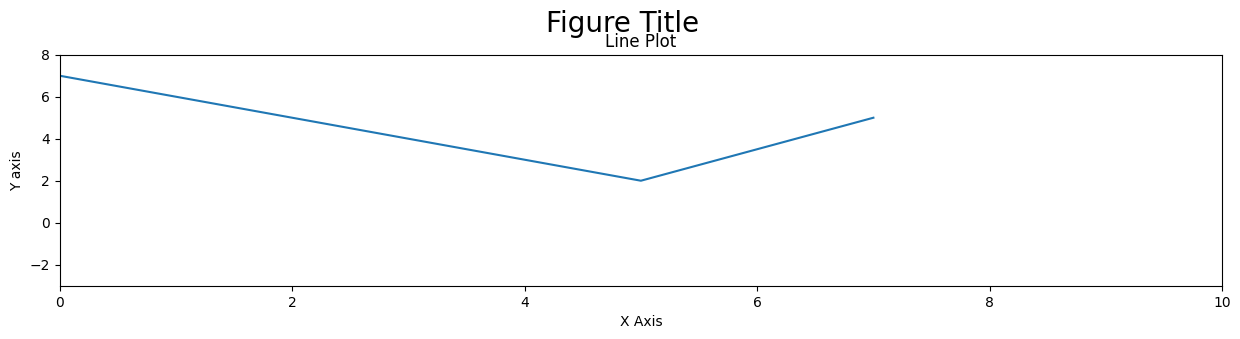

In [2]:
x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)



Text(0.5, 1.03, 'Figure Title')

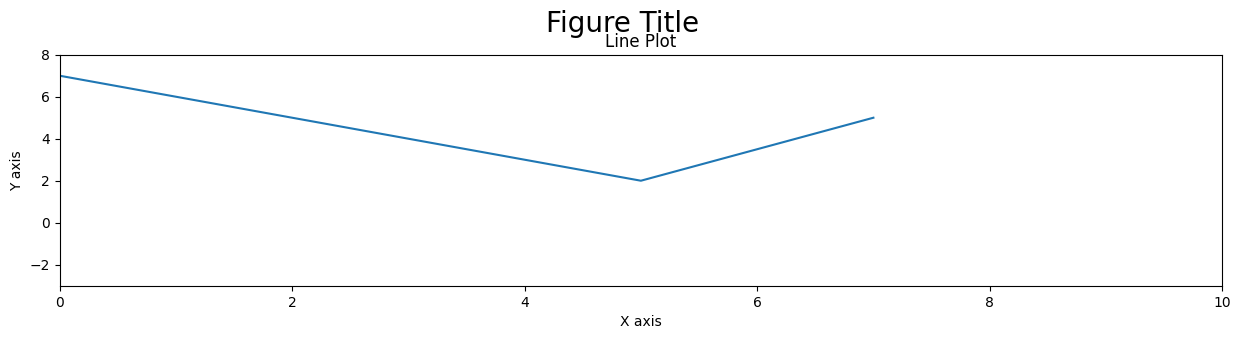

In [3]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)

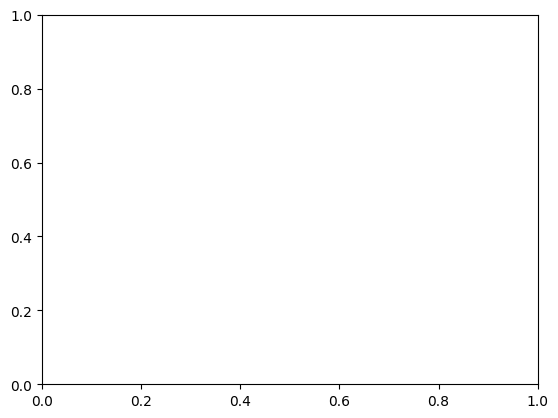

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1)

In [5]:
type(fig)

matplotlib.figure.Figure

In [6]:
type(ax)

matplotlib.axes._axes.Axes

In [7]:
fig.get_size_inches()

array([6.4, 4.8])

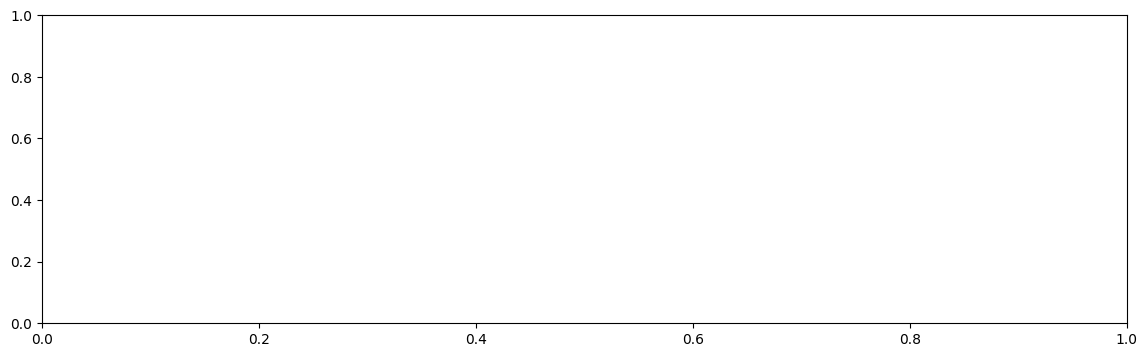

In [8]:
fig.set_size_inches(14, 4)
fig

In [9]:
fig.axes

[<Axes: >]

In [10]:
fig.axes[0] is ax

True

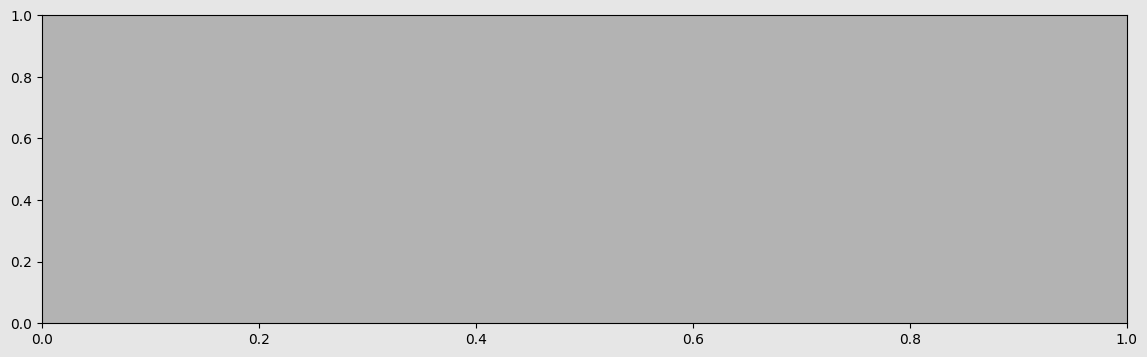

In [11]:
fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

In [12]:
spines = ax.spines
spines

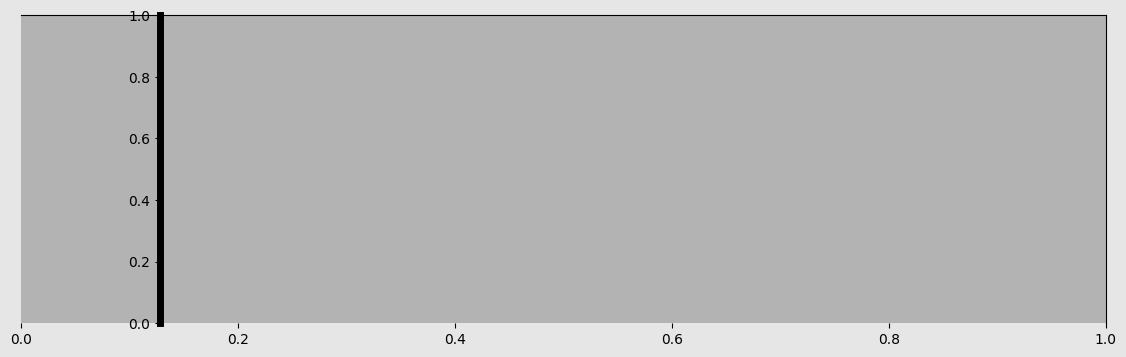

In [15]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)

spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

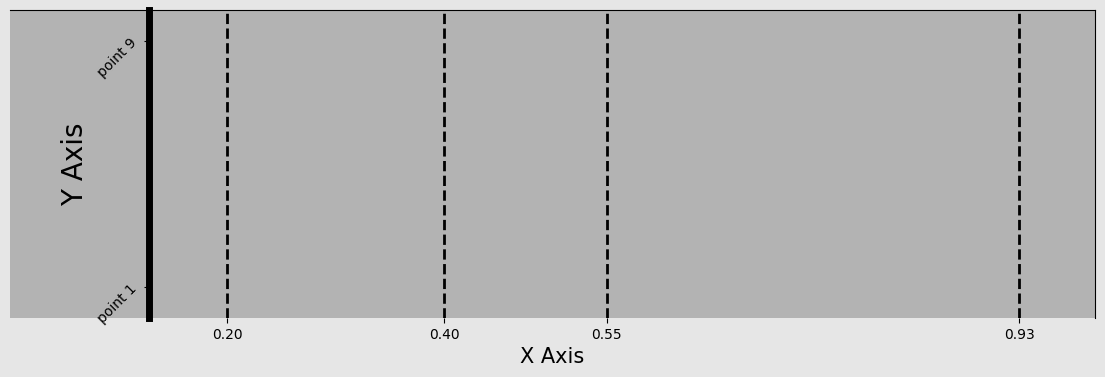

In [16]:
ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)

ax.set_ylabel('Y Axis', family='Calibri', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig

In [17]:
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5, 14.722222222222216, 'X Axis'),
  Text(1, 16.111111111111104, ''),
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x7e6905c6e260>,
 'clip_on': True,
 'clip_path': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure size 1400x400 with 1 Axes>,
 'gid': None,
 'gridlines': <a list of 4 Line2D gridline objects>,
 'in_layout': True,
 'inverted': False,
 'label': Text(0.5, 14.722222222222216, 'X Axis'),
 'label_position': 'bottom',
 'label_text': 'X Axis',
 'major_formatter': <matplotlib.ticker.ScalarFormatter at 0x7e6903991b40>,
 'major_locator': <matplotlib.ticker.FixedLocator at 0x7e6905ca7790>,
 'major_ticks': [<matplotlib.axis.XTick at 0x7e6905c6c340>,
 'majorticklabels': [Text(0.2, 0, '0.20'),
  Text(0.4, 0, '0.40'),
  Text(0.55, 0, '0.55'),
  Text(0.93, 0, '0.93')],
 'majorticklines': <a list of 8 Line2D ticklines objects>,
 'majorticklocs': array([0.2 , 0.4 , 0.55, 0.93]),
 'minor_form

In [19]:
movie = pd.read_csv('data/movie.csv')

med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    33.0
2013.0    34.0
2014.0    34.4
2015.0    34.4
2016.0    35.0
Name: budget, dtype: float64

In [20]:
years = med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [21]:
budget = med_budget_roll.values
budget[-5:]

array([33. , 34. , 34.4, 34.4, 35. ])

Text(0, 0.5, 'Millions of Dollars')

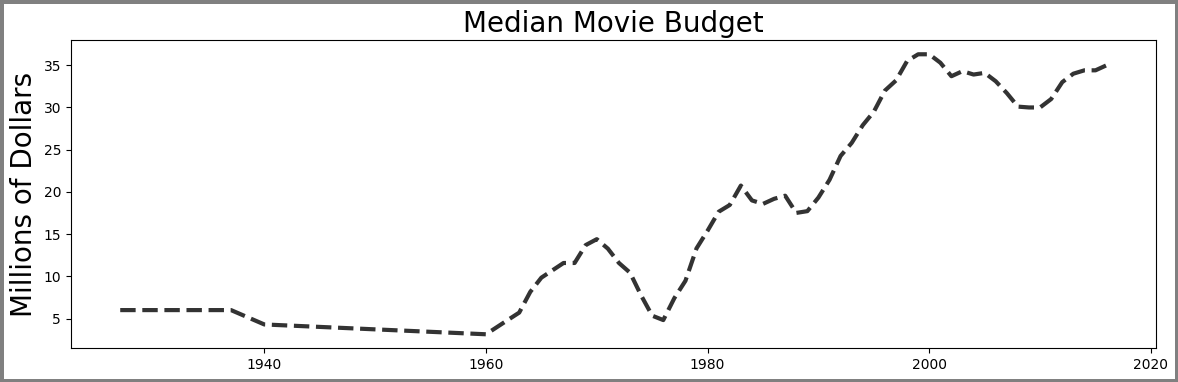

In [22]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

In [23]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    129
2013.0    137
2014.0    134
2015.0    116
2016.0     64
Name: budget, dtype: int64

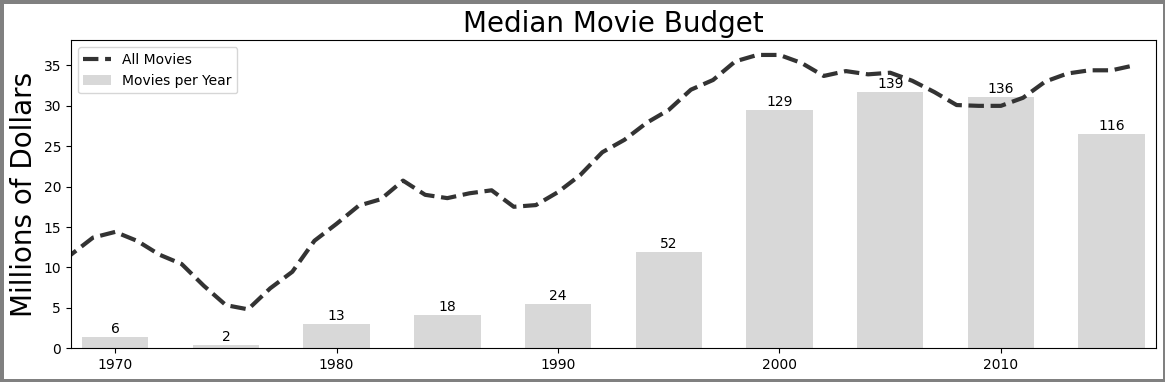

In [24]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig

## How it works...

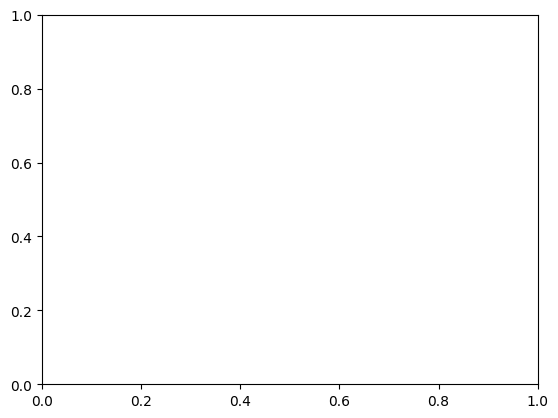

In [25]:
plot_objects = plt.subplots()

In [26]:
type(plot_objects)

tuple

In [27]:
fig = plot_objects[0]
ax = plot_objects[1]

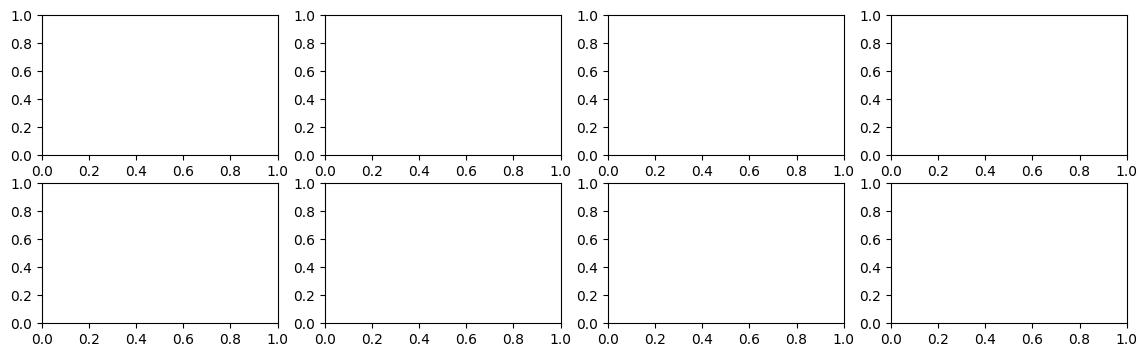

In [28]:
plot_objects = plt.subplots(2, 4, figsize=(14, 4))

In [29]:
plot_objects[1]

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [30]:
fig.get_axes() == fig.axes

True

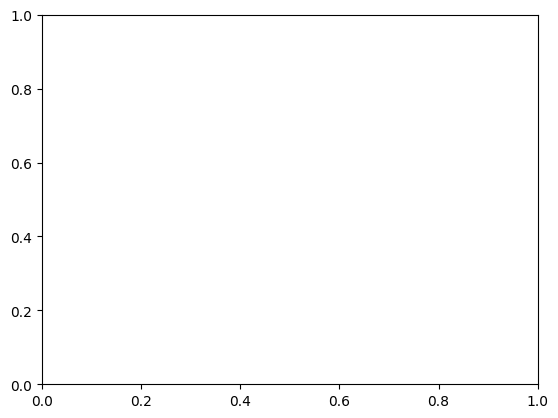

In [31]:
fig, ax = plt.subplots()

In [32]:
fig.axes == fig.get_axes()

True

In [33]:
ax.xaxis == ax.get_xaxis()

True

In [34]:
ax.yaxis == ax.get_yaxis()

True

# Visualizing data with matplotlib

In [35]:
movie = pd.read_csv('data/movie.csv')
med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [36]:
years = med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [37]:
budget = med_budget_roll.values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

Text(0, 0.5, 'Millions of Dollars')

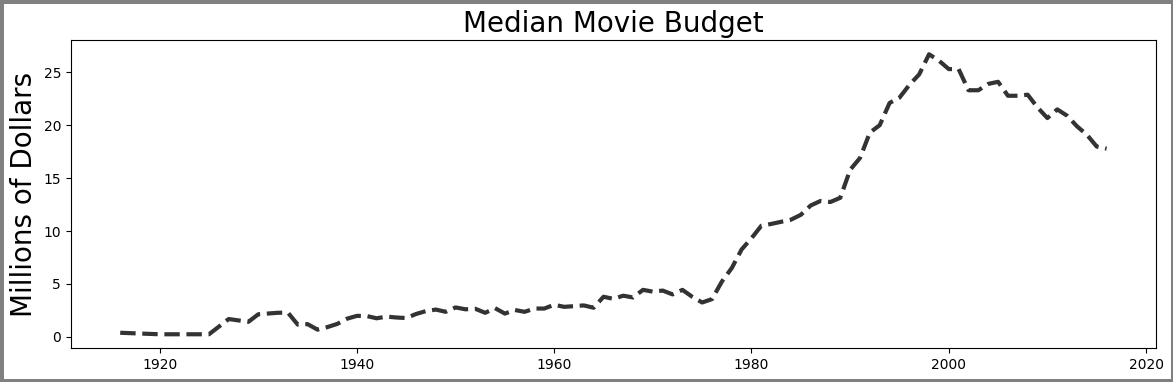

In [38]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

In [39]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

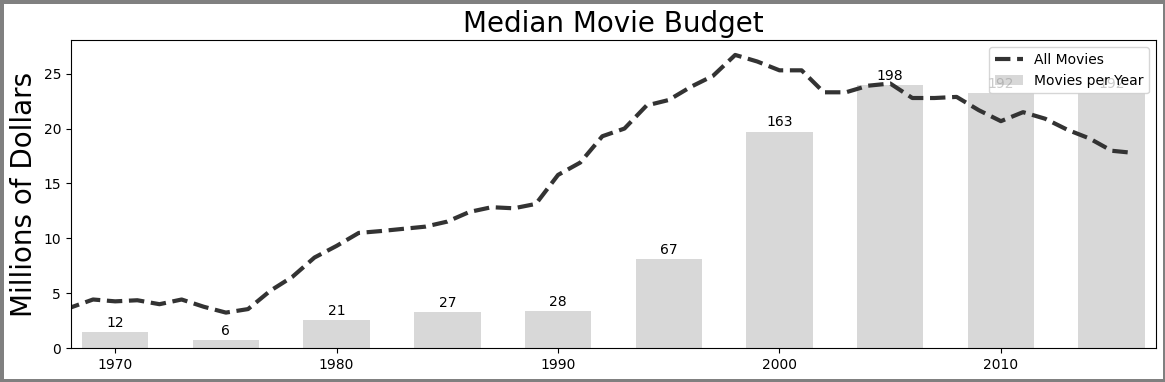

In [40]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig

In [41]:
top10 = movie.sort_values('budget', ascending=False) \
             .groupby('title_year')['budget'] \
             .apply(lambda x: x.iloc[:10].median() / 1e6)

top10_roll = top10.rolling(5, min_periods=1).mean()
top10_roll.tail()

title_year
2012.0    192.9
2013.0    195.9
2014.0    191.7
2015.0    186.8
2016.0    189.1
Name: budget, dtype: float64

Text(0, 0.6, 'Millions of Dollars')

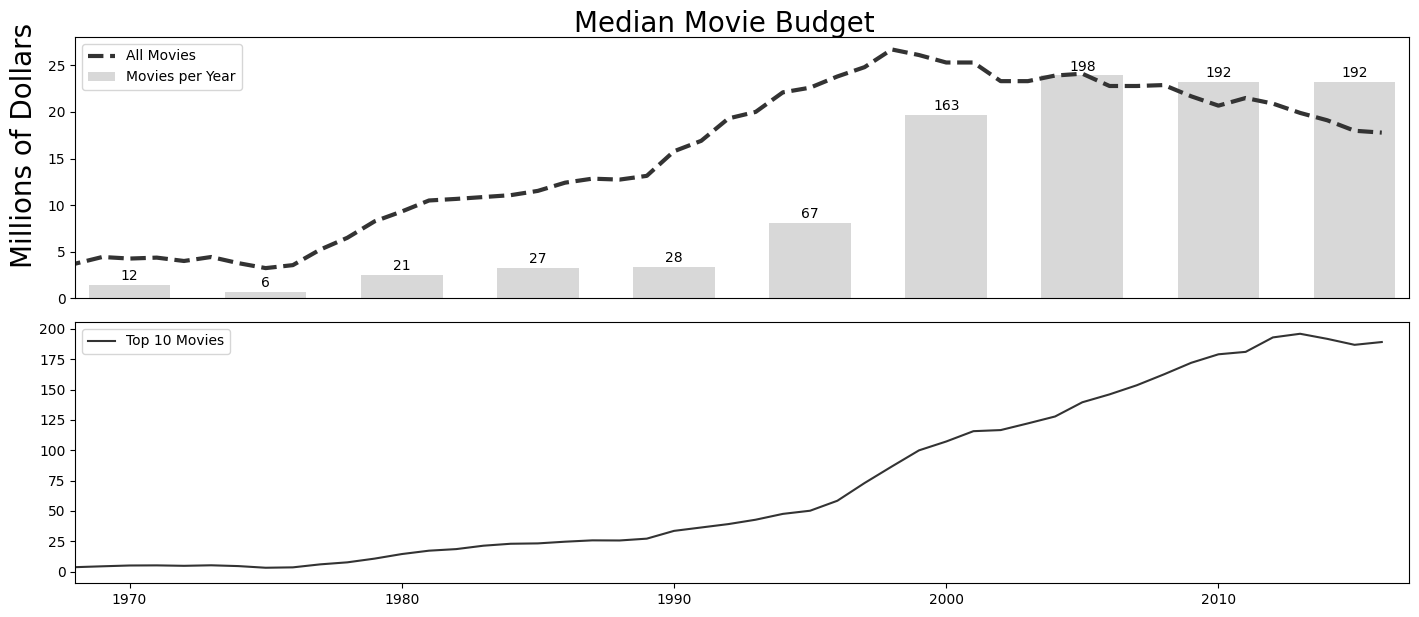

In [42]:
fig2, ax_array = plt.subplots(2, 1, figsize=(14,6), sharex=True)
ax1 = ax_array[0]
ax2 = ax_array[1]

ax1.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
ax1.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax1.legend(loc='upper left')
ax1.set_xlim(1968, 2017)
plt.setp(ax1.get_xticklines(), visible=False)

for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y + .5, str(v), ha='center')

ax2.plot(years, top10_roll.values, color='.2', label='Top 10 Movies')
ax2.legend(loc='upper left')

fig2.tight_layout()
fig2.suptitle('Median Movie Budget', y=1.02, **text_kwargs)
fig2.text(0, .6, 'Millions of Dollars', rotation='vertical', ha='center', **text_kwargs)

# import os
# path = os.path.expanduser('~/Desktop/movie_budget.png')
# fig2.savefig(path, bbox_inches='tight')

## How it works...

In [43]:
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [44]:
med_budget.loc[2012:2016].mean()

17.78

In [45]:
med_budget.loc[2011:2015].mean()

17.98

In [46]:
med_budget.loc[2010:2014].mean()

19.1

In [ ]:
# os.path.expanduser('~/Desktop/movie_budget.png')

'/Users/Ted/Desktop/movie_budget.png'

## There's more...

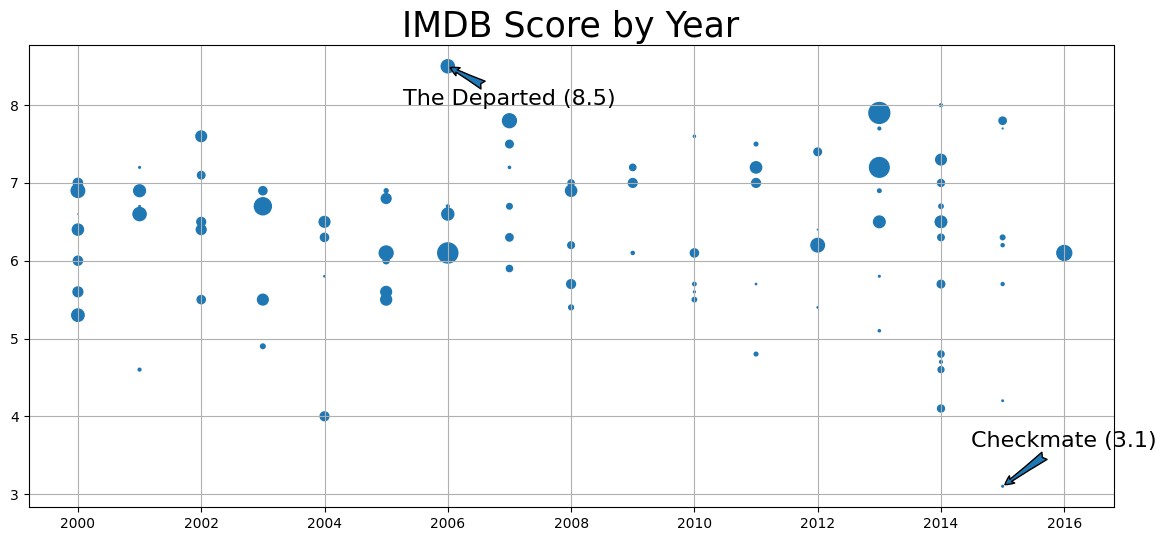

In [48]:
cols = ['budget', 'title_year', 'imdb_score', 'movie_title']
m = movie[cols].dropna()

# m = movie[['budget', 'title_year', 'imdb_score', 'movie_title']].dropna()
m['budget2'] = m['budget'] / 1e6
np.random.seed(0)
movie_samp = m.query('title_year >= 2000').sample(100)

fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(x='title_year', y='imdb_score', s='budget2', data=movie_samp)

idx_min = movie_samp['imdb_score'].idxmin()
idx_max = movie_samp['imdb_score'].idxmax()

for idx, offset in zip([idx_min, idx_max], [.5, -.5]):
    year = movie_samp.loc[idx, 'title_year']
    score = movie_samp.loc[idx, 'imdb_score']
    title = movie_samp.loc[idx, 'movie_title']
    ax.annotate(xy=(year, score),
                xytext=(year + 1, score + offset),
                text=title + ' ({})'.format(score),
                ha='center',
                size=16,
                arrowprops=dict(arrowstyle="fancy"))
ax.set_title('IMDB Score by Year', size=25)
ax.grid(True)

# Plotting basics with pandas

In [61]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'],
                  data={'Apples':[20, 10, 40, 20, 50],
                        'Oranges':[35, 40, 25, 19, 33]})
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


<Axes: >

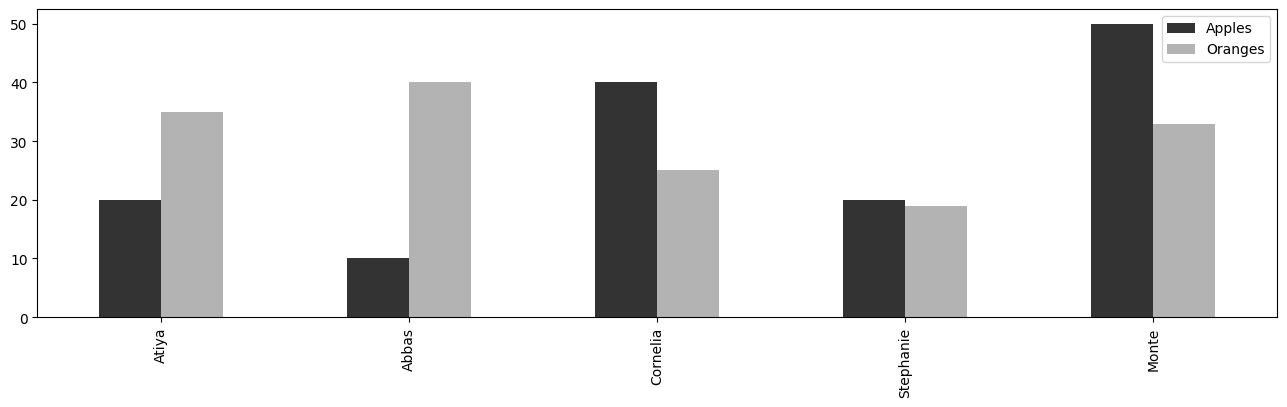

In [62]:
color = ['.2', '.7']
df.plot(kind='bar', color=color, figsize=(16,4))

<Axes: ylabel='Density'>

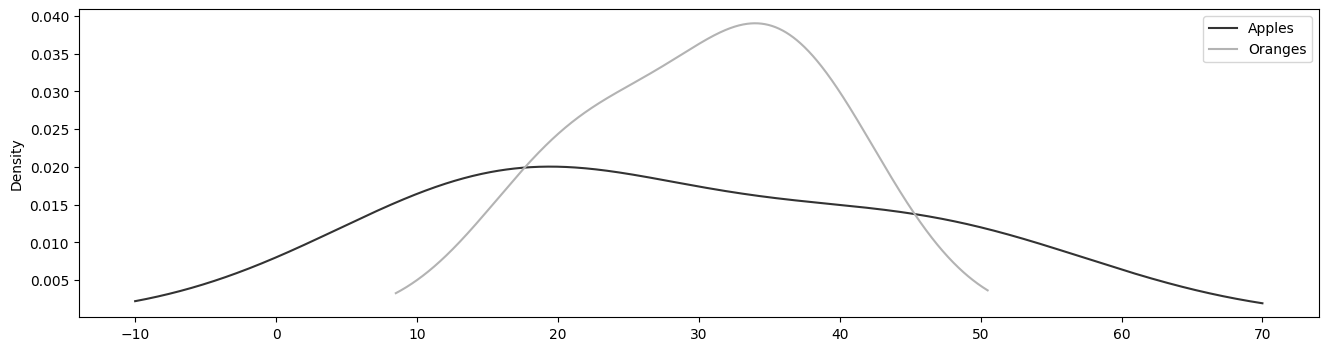

In [63]:
df.plot(kind='kde', color=color, figsize=(16,4))

<Axes: title={'center': 'Bar plot'}>

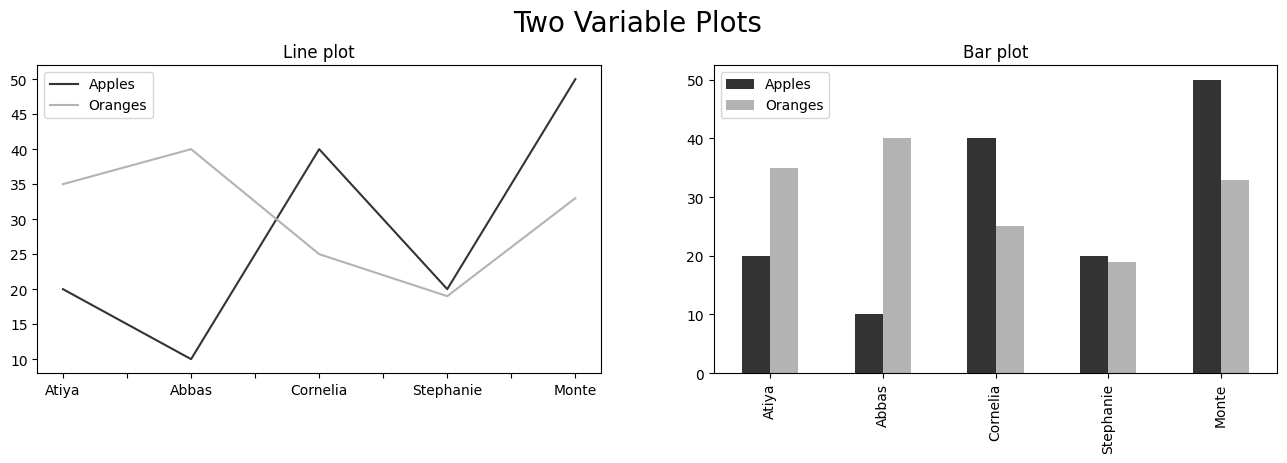

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Two Variable Plots', size=20, y=1.02)
df.plot(kind='line', color=color, ax=ax1, title='Line plot')
df.plot(kind='bar', color=color, ax=ax2, title='Bar plot')

<Axes: title={'center': 'Histogram'}, ylabel='Frequency'>

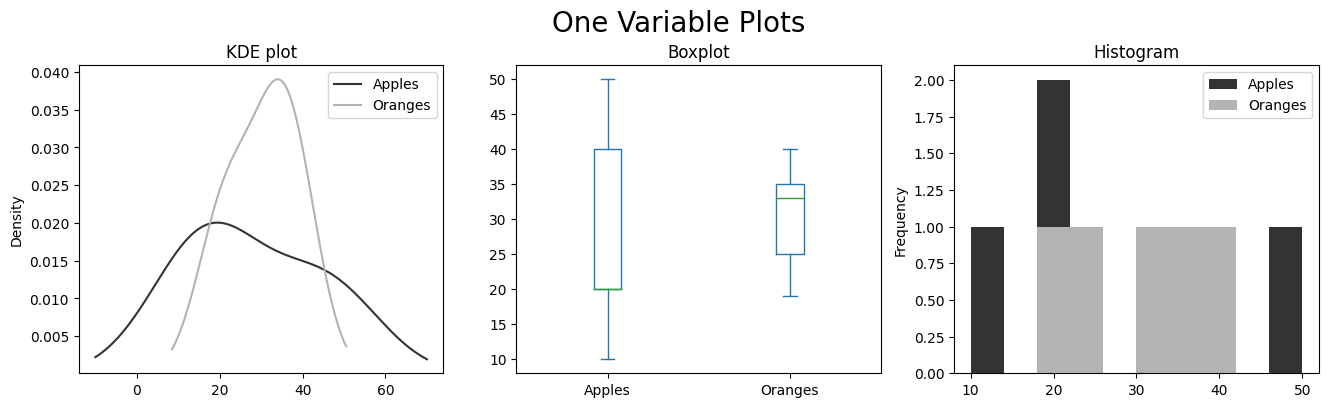

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.plot(kind='kde', color=color, ax=ax1, title='KDE plot')
df.plot(kind='box', ax=ax2, title='Boxplot')
df.plot(kind='hist', color=color, ax=ax3, title='Histogram')

## There's more

<Axes: ylabel='Density'>

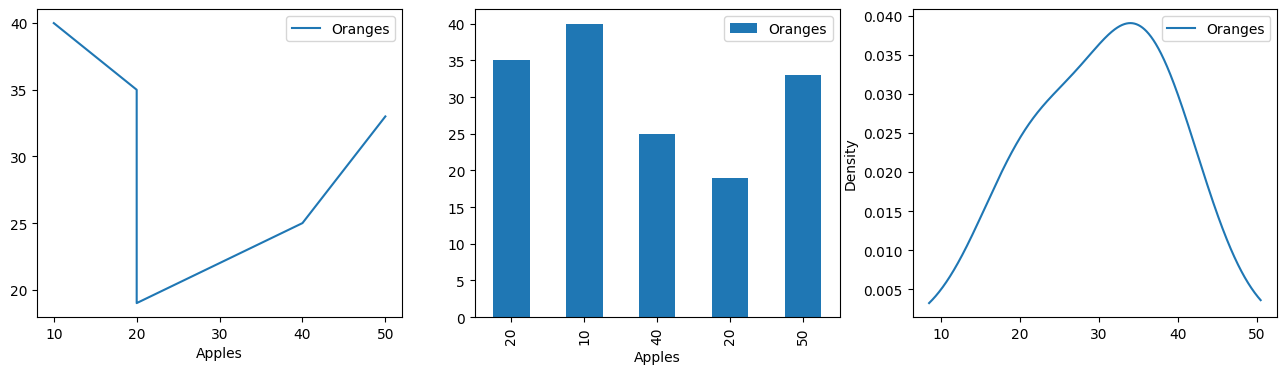

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
df.sort_values('Apples').plot(x='Apples', y='Oranges', kind='line', ax=ax1)
df.plot(x='Apples', y='Oranges', kind='bar', ax=ax2)
df.plot(x='Apples', kind='kde', ax=ax3)

# Visualizing the flights dataset

In [69]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590.0,1905.0,65.0,0.0,0.0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452.0,1333.0,-13.0,0.0,0.0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641.0,1453.0,35.0,0.0,0.0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192.0,1935.0,-7.0,0.0,0.0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363.0,2225.0,39.0,0.0,0.0


In [70]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
flights['ON_TIME'] = 1 - flights[cols].any(axis=1)

cols.append('ON_TIME')
status = flights[cols].sum()
status

DIVERTED       106.0
CANCELLED      729.0
DELAYED       8836.0
ON_TIME      31567.0
dtype: float64

<Axes: title={'center': 'Arrival Delay'}, ylabel='Frequency'>

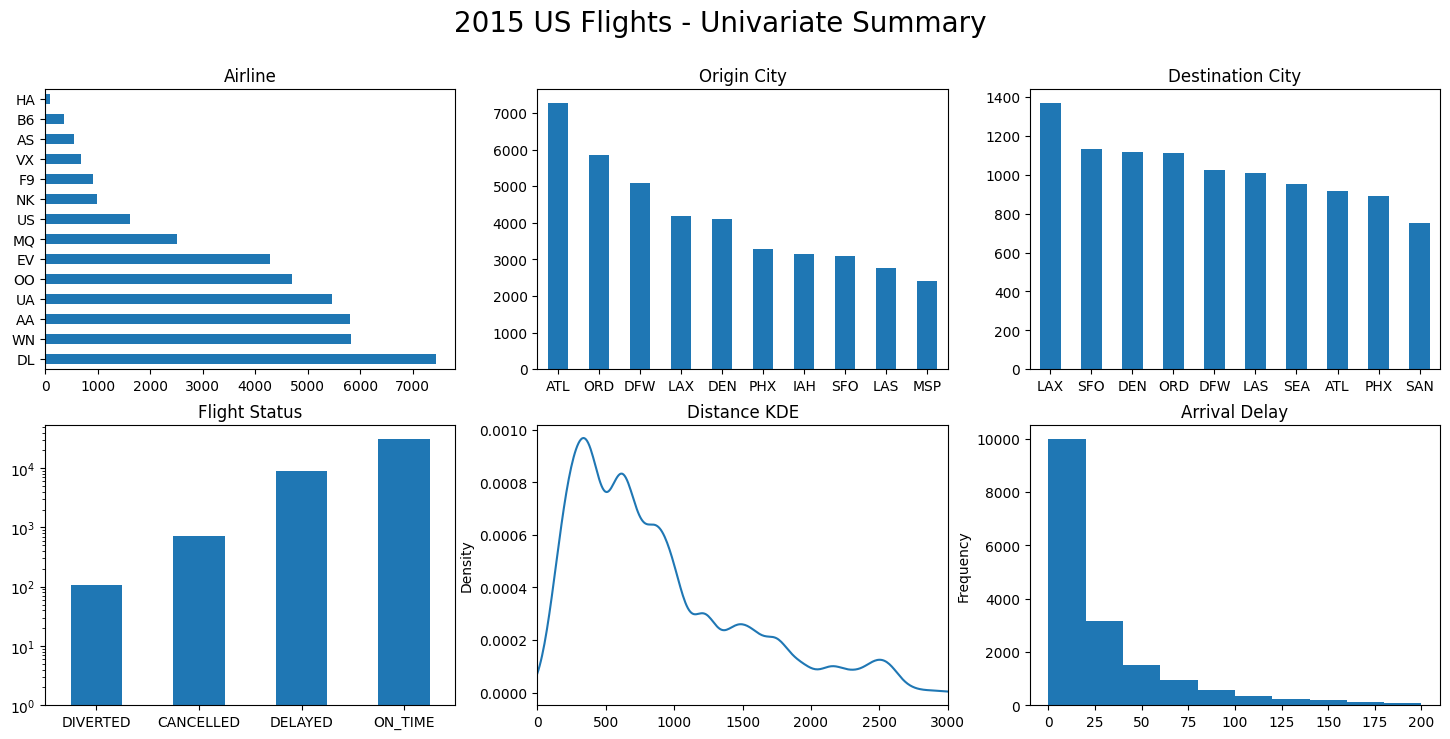

In [71]:
fig, ax_array = plt.subplots(2, 3, figsize=(18,8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)

ac = flights['AIRLINE'].value_counts()
ac.plot(kind='barh', ax=ax1, title ='Airline')

oc = flights['ORG_AIR'].value_counts()
oc.plot(kind='bar', ax=ax2, rot=0, title='Origin City')

dc = flights['DEST_AIR'].value_counts().head(10)
dc.plot(kind='bar', ax=ax3, rot=0, title='Destination City')

status.plot(kind='bar', ax=ax4, rot=0, log=True, title='Flight Status')
flights['DIST'].plot(kind='kde', ax=ax5, xlim=(0, 3000),
                     title='Distance KDE')
flights['ARR_DELAY'].plot(kind='hist', ax=ax6,
                          title='Arrival Delay', range=(0,200))

In [72]:
hour = flights['SCHED_DEP'] // 100
minute = flights['SCHED_DEP'] % 100
df_date = flights[['MONTH', 'DAY']].assign(YEAR=2015, HOUR=hour, MINUTE=minute)
df_date.head()

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20


In [73]:
flight_dep = pd.to_datetime(df_date)
flight_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

<Axes: title={'center': 'Flights per Week'}>

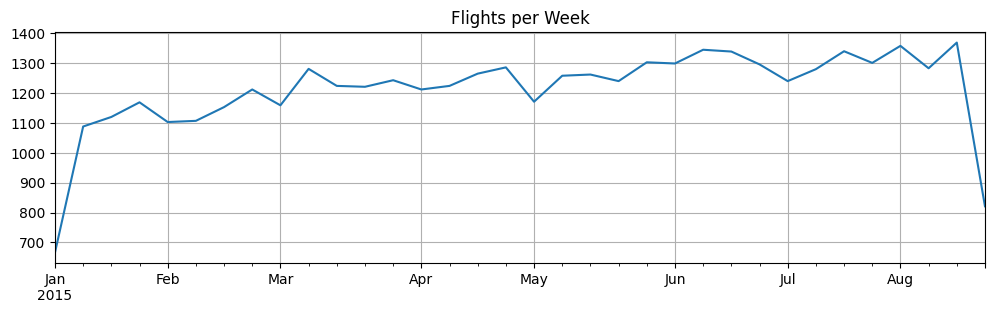

In [74]:
flights.index = flight_dep
fc = flights.resample('W').size()
fc.plot(figsize=(12,3), title='Flights per Week', grid=True)

<Axes: title={'center': 'Average Distance per Destination'}, xlabel='DEST_AIR'>

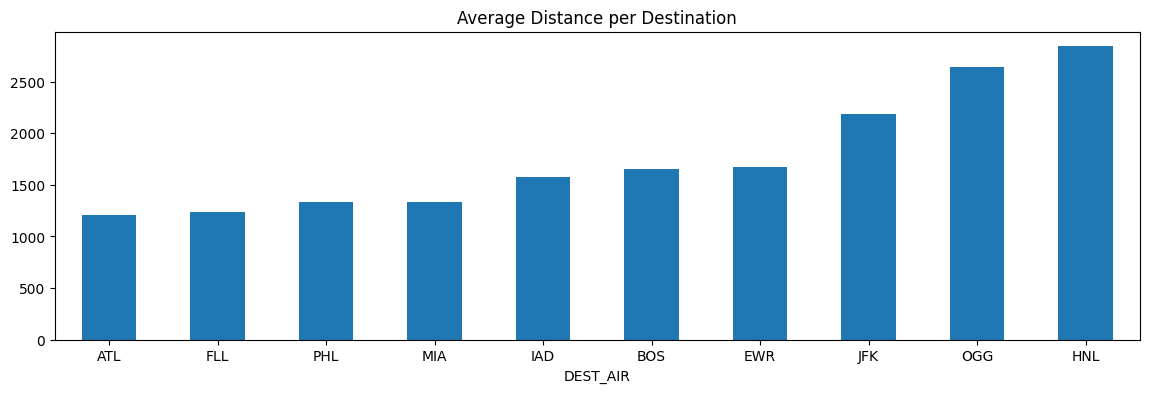

In [81]:
flights.groupby('DEST_AIR')['DIST'] \
       .agg(['mean', 'count']) \
       .query('count > 100') \
       .sort_values('mean') \
       .tail(10) \
       .plot(kind='bar', y='mean', legend=False,
             rot=0, figsize=(14,4),
             title='Average Distance per Destination')

<Axes: xlabel='DIST', ylabel='AIR_TIME'>

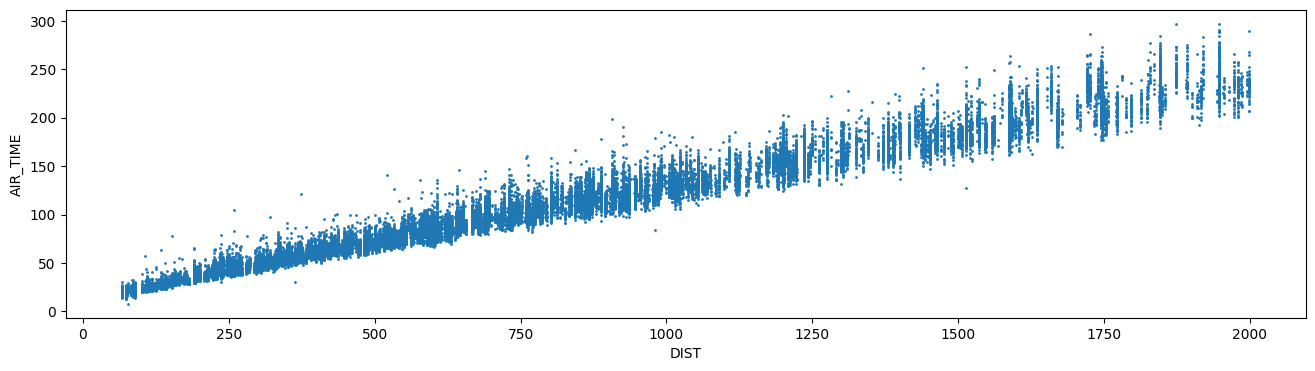

In [82]:
fs = flights.reset_index(drop=True)[['DIST', 'AIR_TIME']].query('DIST <= 2000').dropna()
fs.plot(x='DIST', y='AIR_TIME', kind='scatter', s=1, figsize=(16,4))

In [83]:
fs['DIST_GROUP'] = pd.cut(fs['DIST'], bins=range(0, 2001, 250))
fs['DIST_GROUP'].value_counts().sort_index()

(0, 250]        4620
(250, 500]      8947
(500, 750]      8083
(750, 1000]     6195
(1000, 1250]    3532
(1250, 1500]    2254
(1500, 1750]    2679
(1750, 2000]    1253
Name: DIST_GROUP, dtype: int64

In [84]:
normalize = lambda x: (x - x.mean()) / x.std()
fs['TIME_SCORE'] = fs.groupby('DIST_GROUP')['AIR_TIME'] \
                     .transform(normalize)

fs.head()

,DIST,AIR_TIME,DIST_GROUP,TIME_SCORE
0,590.0,94.0,"(500, 750]",0.482821
1,1452.0,154.0,"(1250, 1500]",-1.311594
2,641.0,85.0,"(500, 750]",-0.307170
3,1192.0,126.0,"(1000, 1250]",-1.246392
4,1363.0,166.0,"(1250, 1500]",-0.544247


Text(0.5, 0.98, '')

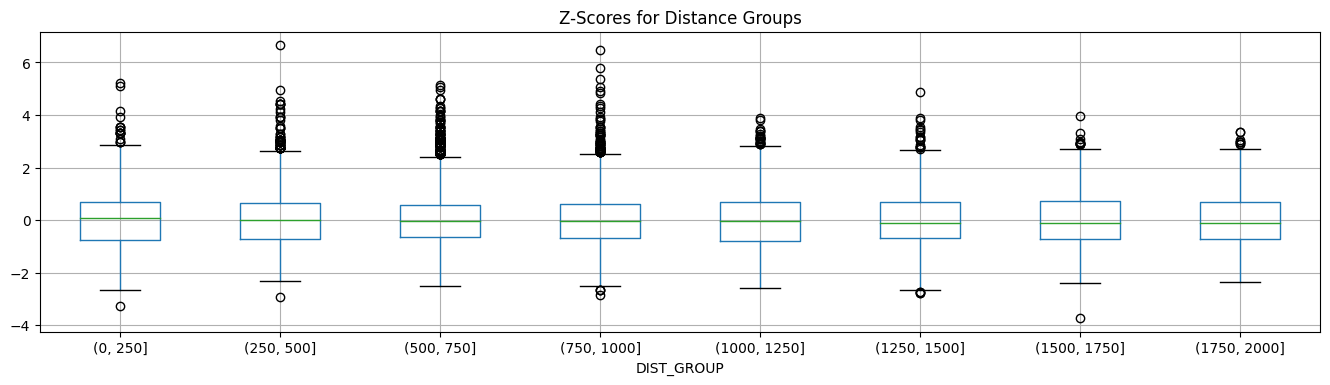

In [85]:
ax = fs.boxplot(by='DIST_GROUP', column='TIME_SCORE', figsize=(16,4))
ax.set_title('Z-Scores for Distance Groups')
ax.figure.suptitle('')

In [86]:
outliers = flights.iloc[fs[fs['TIME_SCORE'] > 6].index]
outliers = outliers[['AIRLINE','ORG_AIR', 'DEST_AIR', 'AIR_TIME',
                     'DIST', 'ARR_DELAY', 'DIVERTED']]
outliers['PLOT_NUM'] = range(1, len(outliers) + 1)
outliers

,AIRLINE,ORG_AIR,DEST_AIR,AIR_TIME,DIST,ARR_DELAY,DIVERTED,PLOT_NUM
2015-04-08 09:40:00,DL,ATL,CVG,121.0,373.0,54.0,0.0,1
2015-05-25 16:30:00,F9,MSP,ATL,199.0,907.0,79.0,0.0,2


Text(0.5, 1.0, 'Flight Time vs Distance with Outliers')

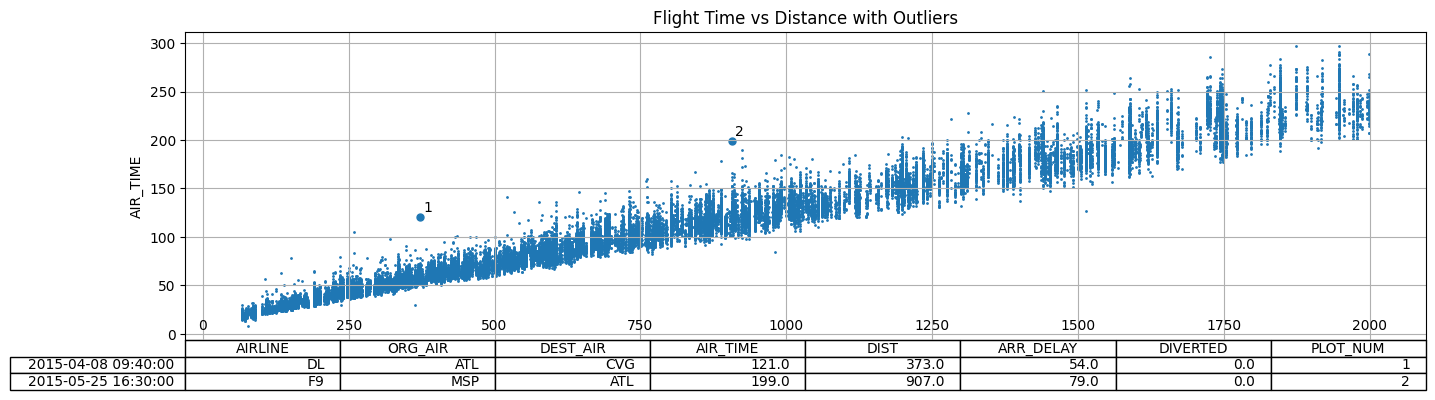

In [87]:
ax = fs.plot(x='DIST', y='AIR_TIME',
             kind='scatter', s=1,
             figsize=(16,4), table=outliers)
outliers.plot(x='DIST', y='AIR_TIME',
              kind='scatter', s=25, ax=ax, grid=True)

outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]
for t, d, n  in outs.itertuples(index=False):
    ax.text(d + 5, t + 5, str(n))

plt.setp(ax.get_xticklabels(), y=.1)
plt.setp(ax.get_xticklines(), visible=False)
ax.set_xlabel('')
ax.set_title('Flight Time vs Distance with Outliers')

## There's more...

# Stacking area charts to discover emerging trends

In [88]:
meetup = pd.read_csv('data/meetup_groups.csv',
                     parse_dates=['join_date'],
                     index_col='join_date')
meetup.head()

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us
2016-07-18 00:48:17,houston machine learning,Houston,TX,us
2017-05-25 12:58:16,houston machine learning,Houston,TX,us


In [89]:
group_count = meetup.groupby([pd.Grouper(freq='W'), 'group']).size()
group_count.head()

join_date   group   
2010-11-07  houstonr     5
2010-11-14  houstonr    11
2010-11-21  houstonr     2
2010-12-05  houstonr     1
2011-01-16  houstonr     2
dtype: int64

In [90]:
gc2 = group_count.unstack('group', fill_value=0)
gc2.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,16,2,6,5,0
2017-09-24,19,4,16,12,7
2017-10-01,20,6,6,20,1
2017-10-08,22,10,10,4,2
2017-10-15,14,13,9,11,2


In [91]:
group_total = gc2.cumsum()
group_total.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,2105,1708,1886,708,1056
2017-09-24,2124,1712,1902,720,1063
2017-10-01,2144,1718,1908,740,1064
2017-10-08,2166,1728,1918,744,1066
2017-10-15,2180,1741,1927,755,1068


In [92]:
row_total = group_total.sum(axis='columns')
group_cum_pct = group_total.div(row_total, axis='index')
group_cum_pct.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481
2017-10-08,0.284177,0.226712,0.251640,0.097612,0.139858
2017-10-15,0.284187,0.226959,0.251206,0.098423,0.139226


Text(0.86, 0.78, 'Machine Learning')

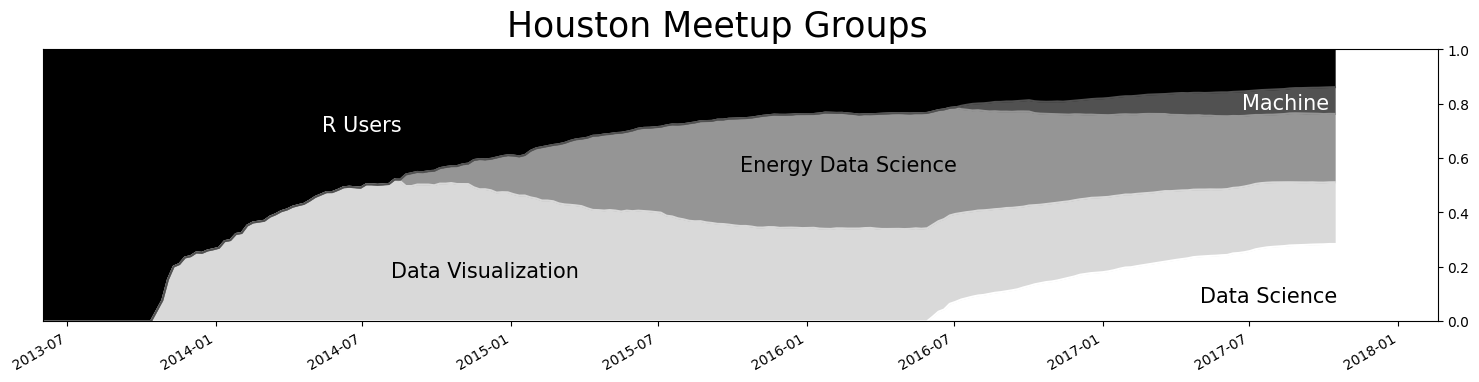

In [97]:
ax = group_cum_pct.plot(kind='area', figsize=(18,4),
                        cmap='Greys', xlim=('2013-6', None),
                        ylim=(0, 1), legend=False)
ax.figure.suptitle('Houston Meetup Groups', size=25)
ax.set_xlabel('')
ax.yaxis.tick_right()

plot_kwargs = dict(xycoords='axes fraction', size=15)
ax.annotate(xy=(.2, .7), text='R Users', color='w', **plot_kwargs)
ax.annotate(xy=(.25, .16), text='Data Visualization', color='k', **plot_kwargs)
ax.annotate(xy=(.5, .55), text='Energy Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.83, .07), text='Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.86, .78), text='Machine Learning', color='w', **plot_kwargs)

## There's more...

In [98]:
pie_data = group_cum_pct.asfreq('3MS', method='bfill') \
                        .tail(6).to_period('M').T
pie_data

join_date,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09
group,,,,,,
houston data science,0.016949,0.110375,0.171245,0.212289,0.244033,0.280162
houston data visualization,0.337827,0.306052,0.277244,0.261103,0.242085,0.230332
houston energy data science,0.416025,0.354467,0.312271,0.288859,0.267576,0.253758
houston machine learning,0.000000,0.037176,0.051969,0.071593,0.087839,0.093026
houstonr,0.229199,0.191931,0.187271,0.166156,0.158467,0.142722


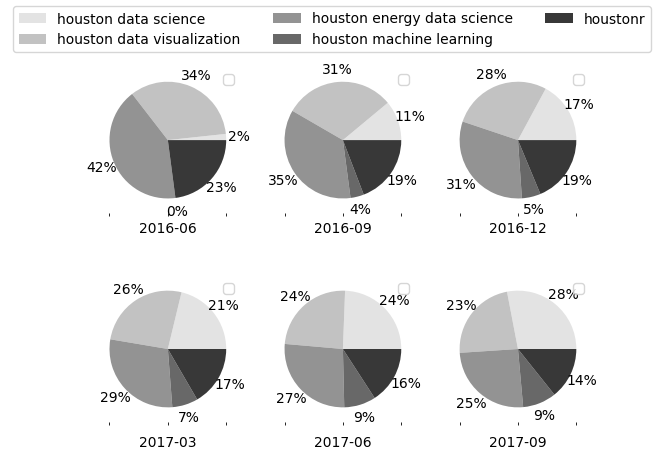

In [101]:
from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))

ax_array = pie_data.plot(kind='pie', subplots=True,
                         layout=(2,3), labels=None,
                         autopct='%1.0f%%', pctdistance=1.22,
                         colors=greys)
ax1 = ax_array[0, 0]
ax1.figure.legend(ax1.patches, pie_data.index, ncol=3)
for ax in ax_array.flatten():
    ax.xaxis.label.set_visible(True)
    ax.set_xlabel(ax.get_ylabel())
    ax.set_ylabel('')
ax1.figure.subplots_adjust(hspace=.3)

# Understanding the differences between seaborn and pandas

## Getting ready...

In [103]:
employee = pd.read_csv('data/employee.csv',
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [104]:
import seaborn as sns

<Axes: xlabel='count', ylabel='DEPARTMENT'>

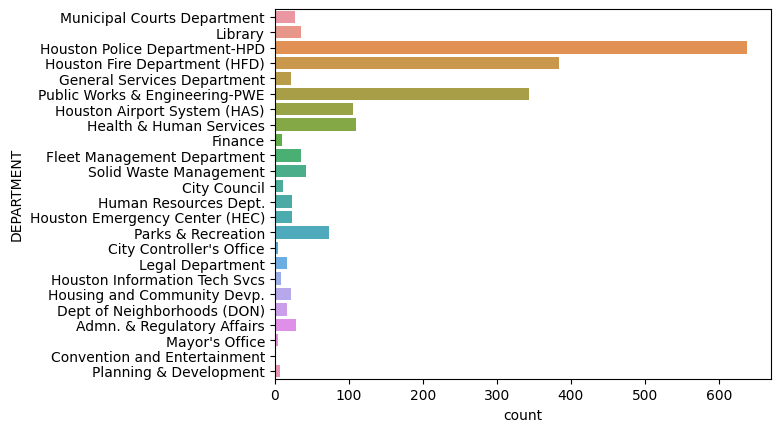

In [105]:
sns.countplot(y='DEPARTMENT', data=employee)

<Axes: >

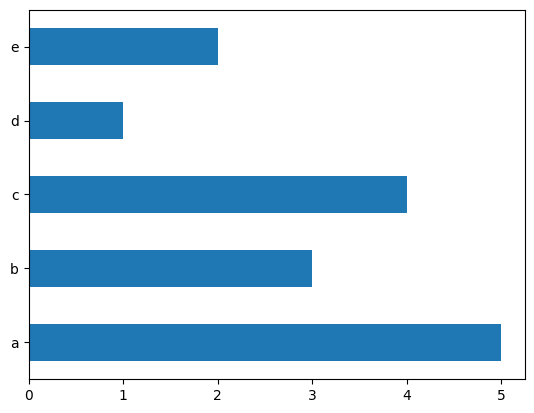

In [108]:
pd.Series({"a": 5, "b": 3, "c": 4, "d":1, "e":2}).plot(kind="barh")

<Axes: >

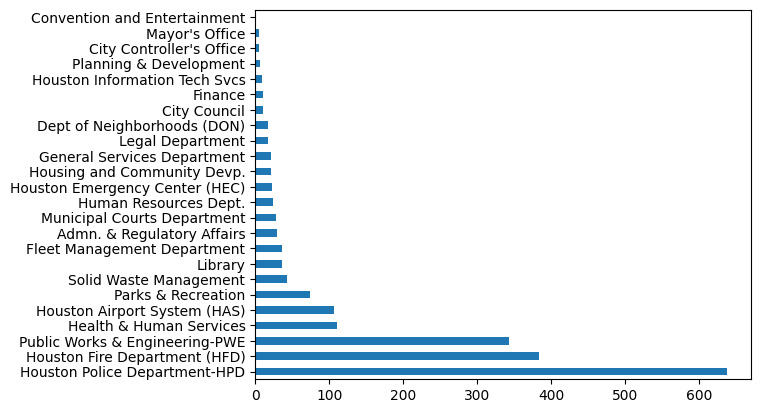

In [107]:
employee['DEPARTMENT'].value_counts().plot(kind = 'barh')

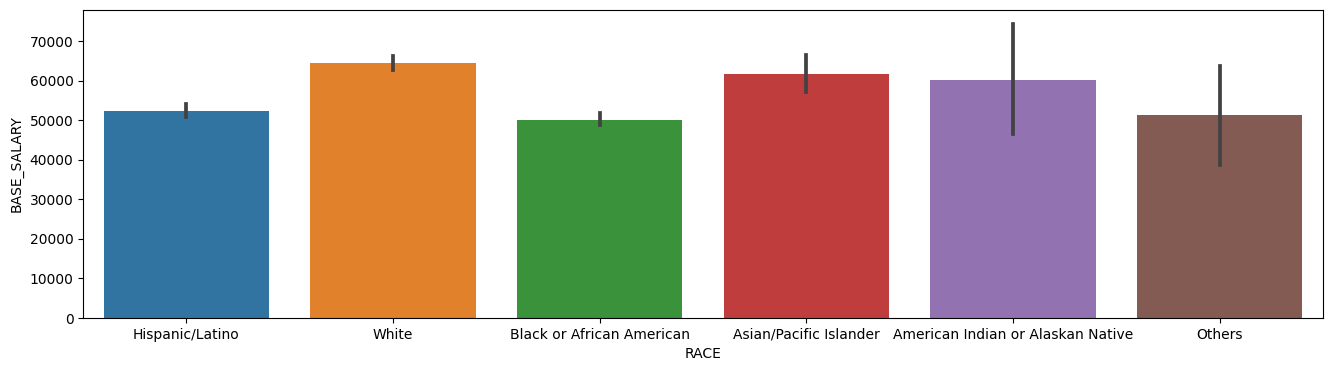

In [109]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', data=employee)
ax.figure.set_size_inches(16, 4)

Text(0, 0.5, 'Mean Salary')

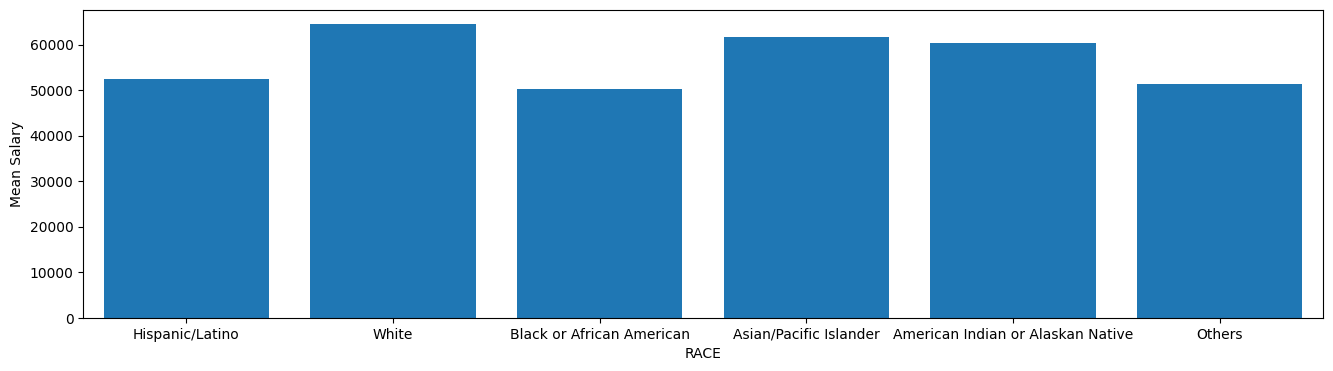

In [110]:
avg_sal = employee.groupby('RACE', sort=False)['BASE_SALARY'].mean()
ax = avg_sal.plot(kind='bar', rot=0, figsize=(16,4), width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel('Mean Salary')

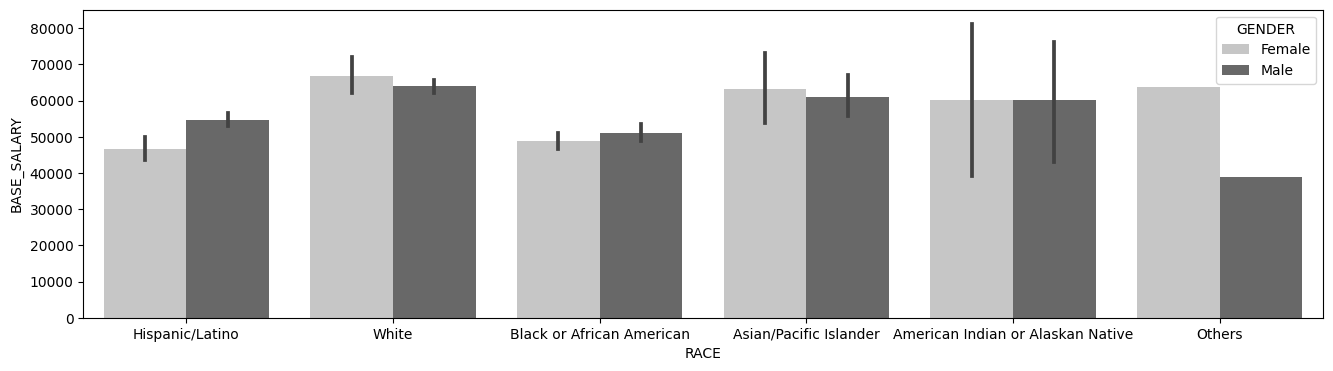

In [111]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER',
                 data=employee, palette='Greys')
ax.figure.set_size_inches(16,4)

<Axes: xlabel='RACE'>

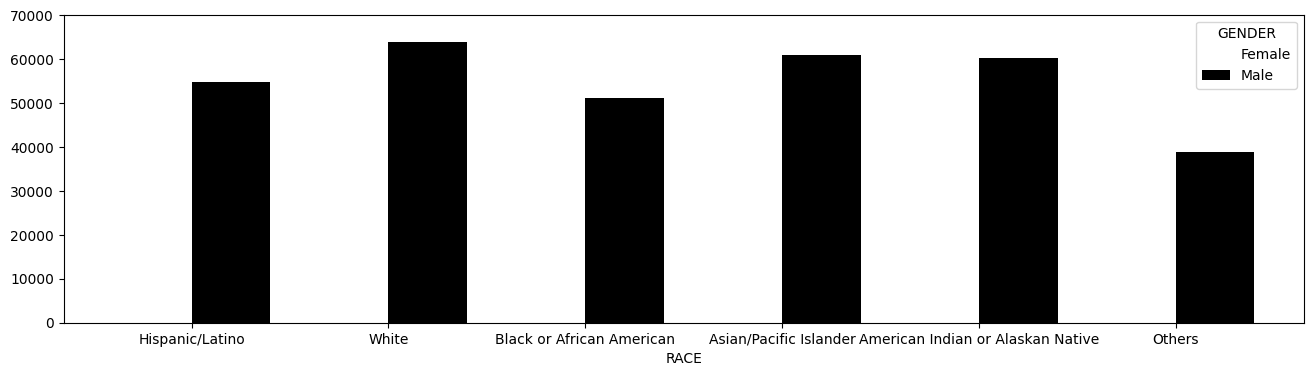

In [112]:
employee.groupby(['RACE', 'GENDER'], sort=False)['BASE_SALARY'] \
        .mean().unstack('GENDER') \
        .plot(kind='bar', figsize=(16,4), rot=0,
              width=.8, cmap='Greys')

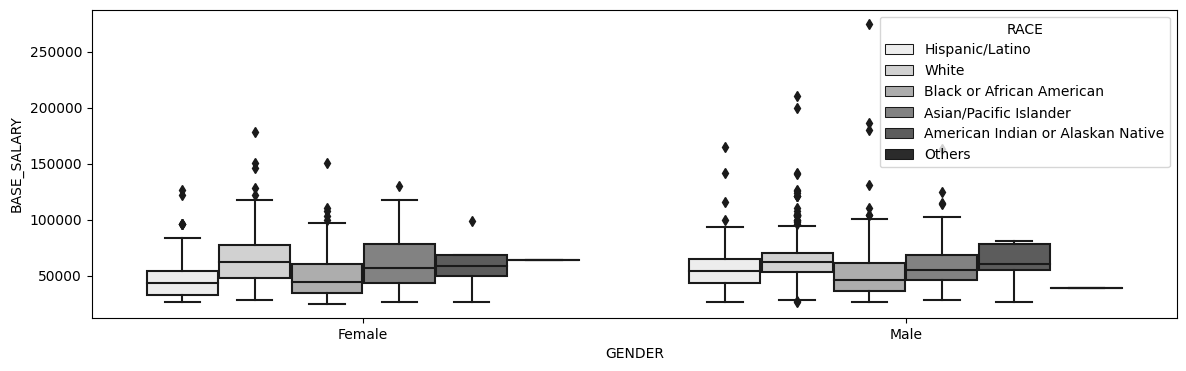

In [113]:
ax = sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, hue='RACE', palette='Greys')
ax.figure.set_size_inches(14,4)

Text(0.5, 0.98, '')

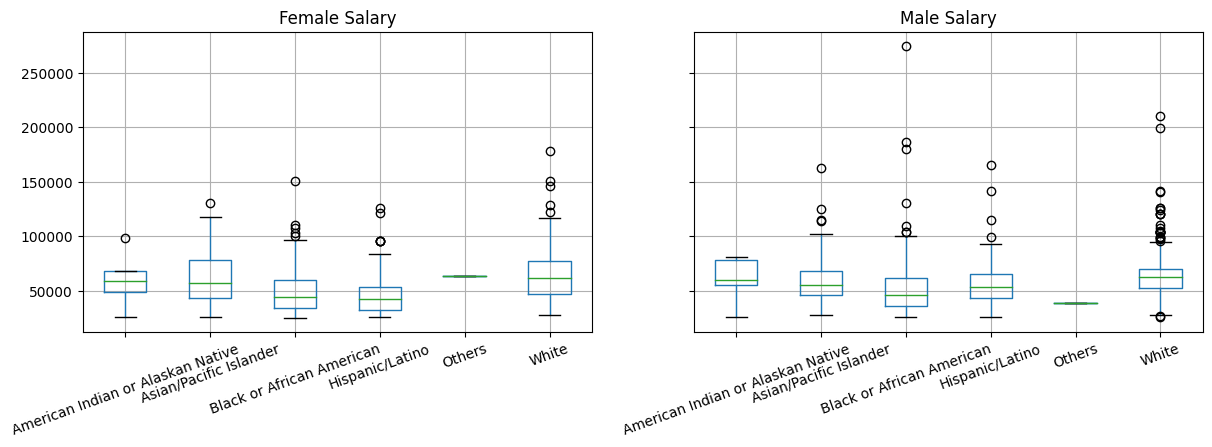

In [114]:
fig, ax_array = plt.subplots(1, 2, figsize=(14,4), sharey=True)
for g, ax in zip(['Female', 'Male'], ax_array):
    employee.query('GENDER== @g') \
            .boxplot(by='RACE', column='BASE_SALARY', ax=ax, rot=20)
    ax.set_title(g + ' Salary')
    ax.set_xlabel('')
fig.suptitle('')

Text(0.5, 0.98, '')

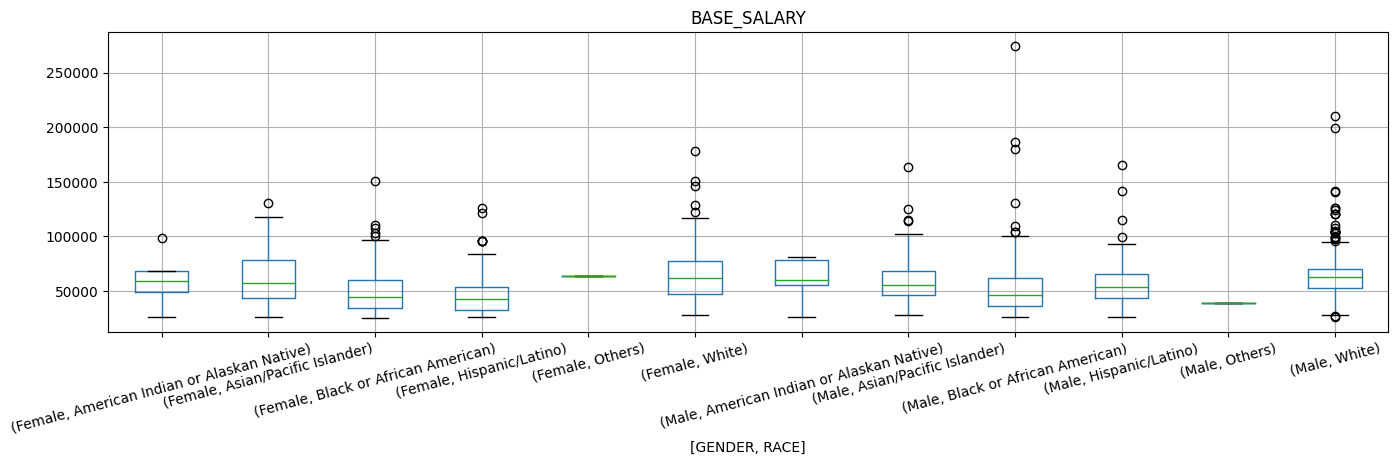

In [115]:
ax = employee.boxplot(by=['GENDER', 'RACE'],
                      column='BASE_SALARY',
                      figsize=(16,4), rot=15)
ax.figure.suptitle('')

# Doing multivariate analysis with seaborn grids

In [118]:
employee = pd.read_csv('data/employee.csv',
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
days_hired = (pd.to_datetime('12-1-2016') - employee['HIRE_DATE'])

one_year = pd.Timedelta(1, days= 365)
employee['YEARS_EXPERIENCE'] =  days_hired / one_year
employee[['HIRE_DATE', 'YEARS_EXPERIENCE']].head()

,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,3.304800e+17
1,2000-07-19,5.165856e+17
2,2015-02-03,5.762880e+16
3,1982-02-08,1.098576e+18
4,1989-06-19,8.663328e+17


In [119]:
import seaborn as sns

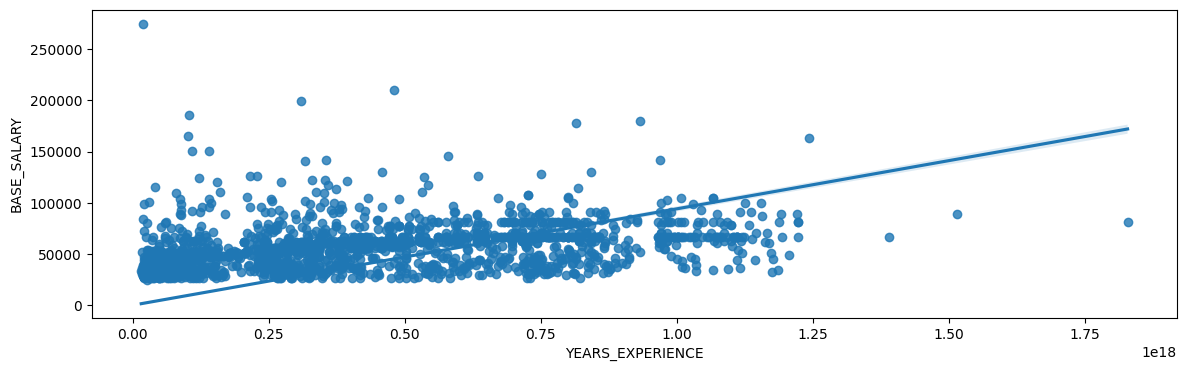

In [120]:
ax = sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                 data=employee)
ax.figure.set_size_inches(14,4)

seaborn.axisgrid.FacetGrid

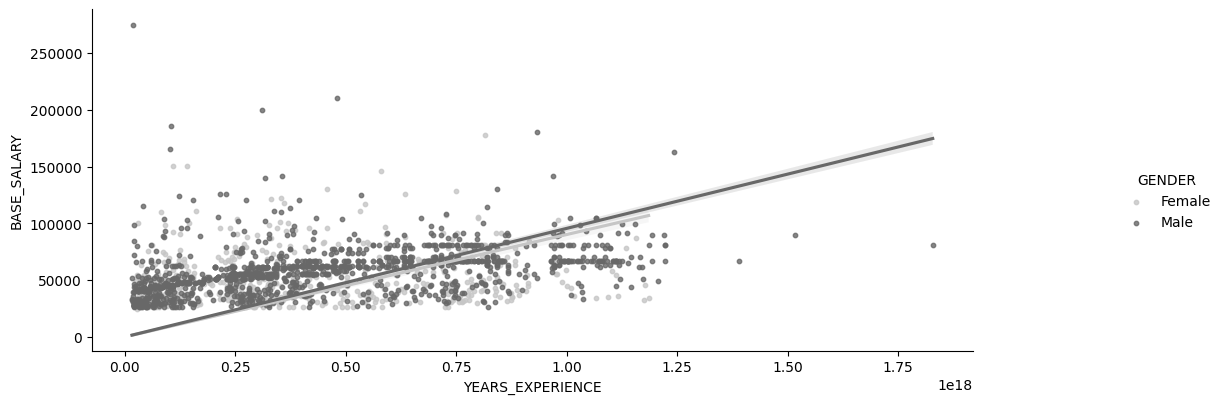

In [121]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', palette='Greys',
                  scatter_kws={'s':10}, data=employee)
grid.fig.set_size_inches(14, 4)
type(grid)

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


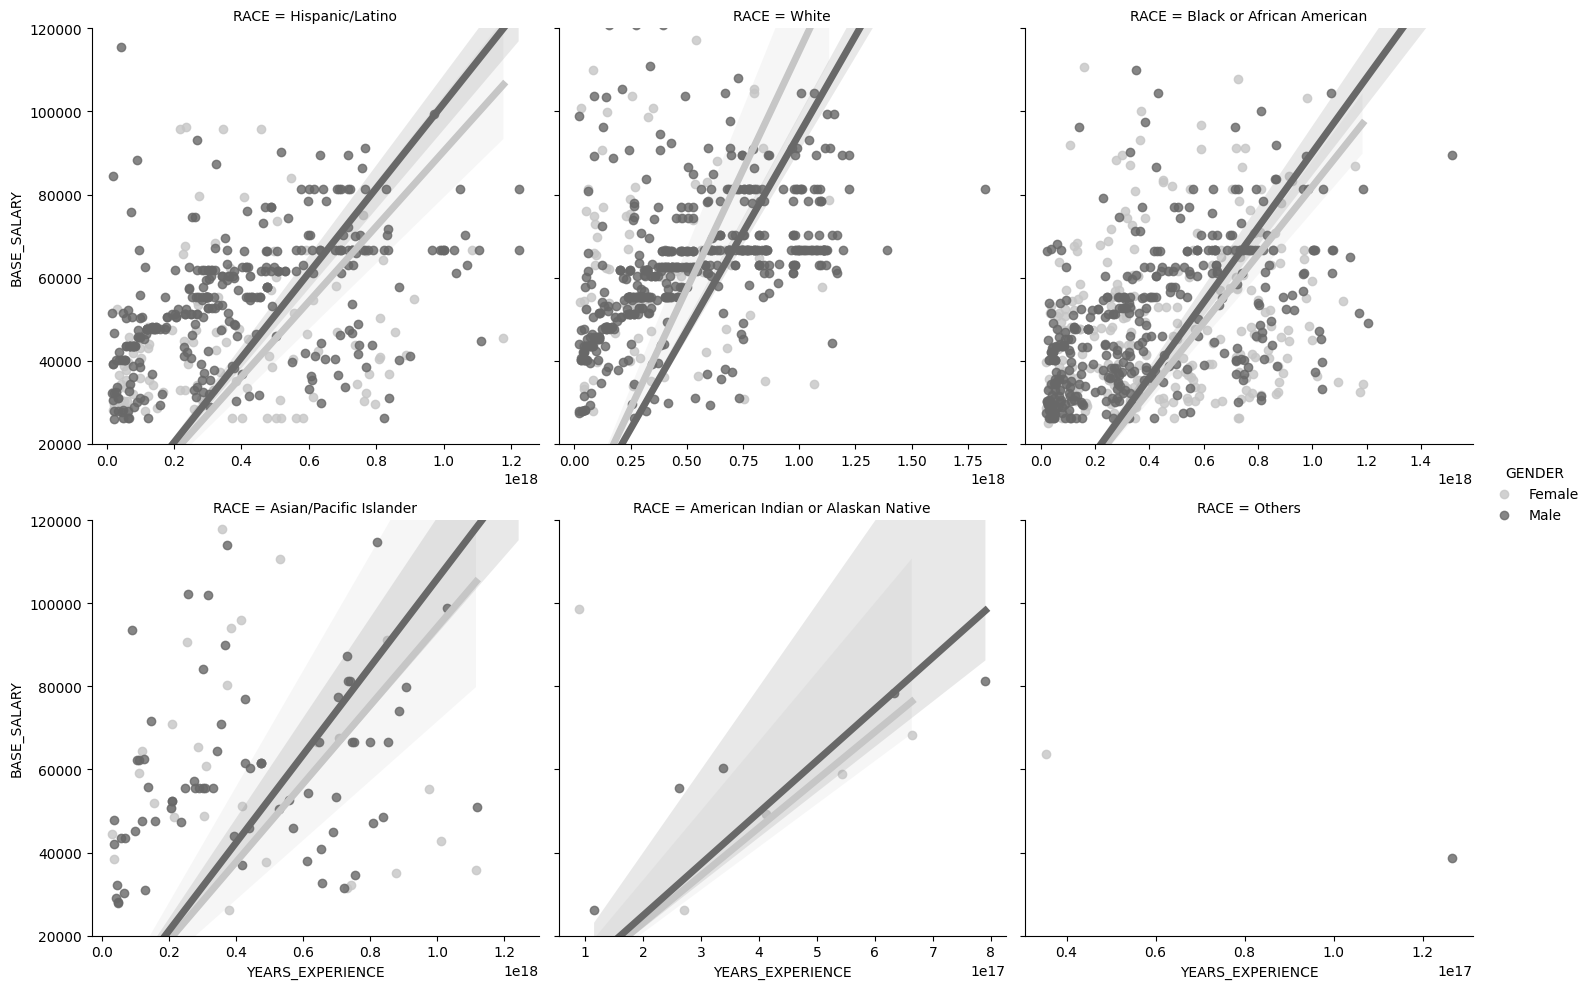

In [122]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', col='RACE', col_wrap=3,
                  palette='Greys', sharex=False,
                  line_kws = {'linewidth':5},
                  data=employee)
grid.set(ylim=(20000, 120000))

In [123]:
deps = employee['DEPARTMENT'].value_counts().index[:2]
races = employee['RACE'].value_counts().index[:3]
is_dep = employee['DEPARTMENT'].isin(deps)
is_race = employee['RACE'].isin(races)
emp2 = employee[is_dep & is_race].copy()
emp2['DEPARTMENT'] = emp2.DEPARTMENT.str.extract('(HPD|HFD)', expand=True)
emp2.shape

(968, 11)

In [124]:
emp2['DEPARTMENT'].value_counts()

HPD    591
HFD    377
Name: DEPARTMENT, dtype: int64

In [125]:
emp2['RACE'].value_counts()

White                        478
Hispanic/Latino              250
Black or African American    240
Name: RACE, dtype: int64

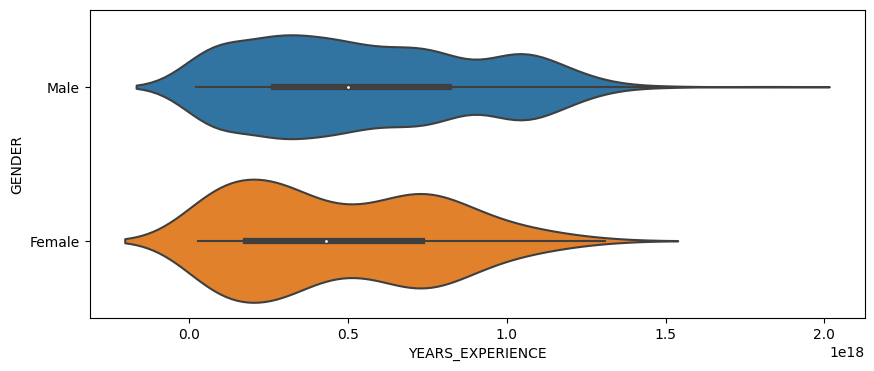

In [126]:
ax = sns.violinplot(x = 'YEARS_EXPERIENCE', y='GENDER', data=emp2)
ax.figure.set_size_inches(10,4)

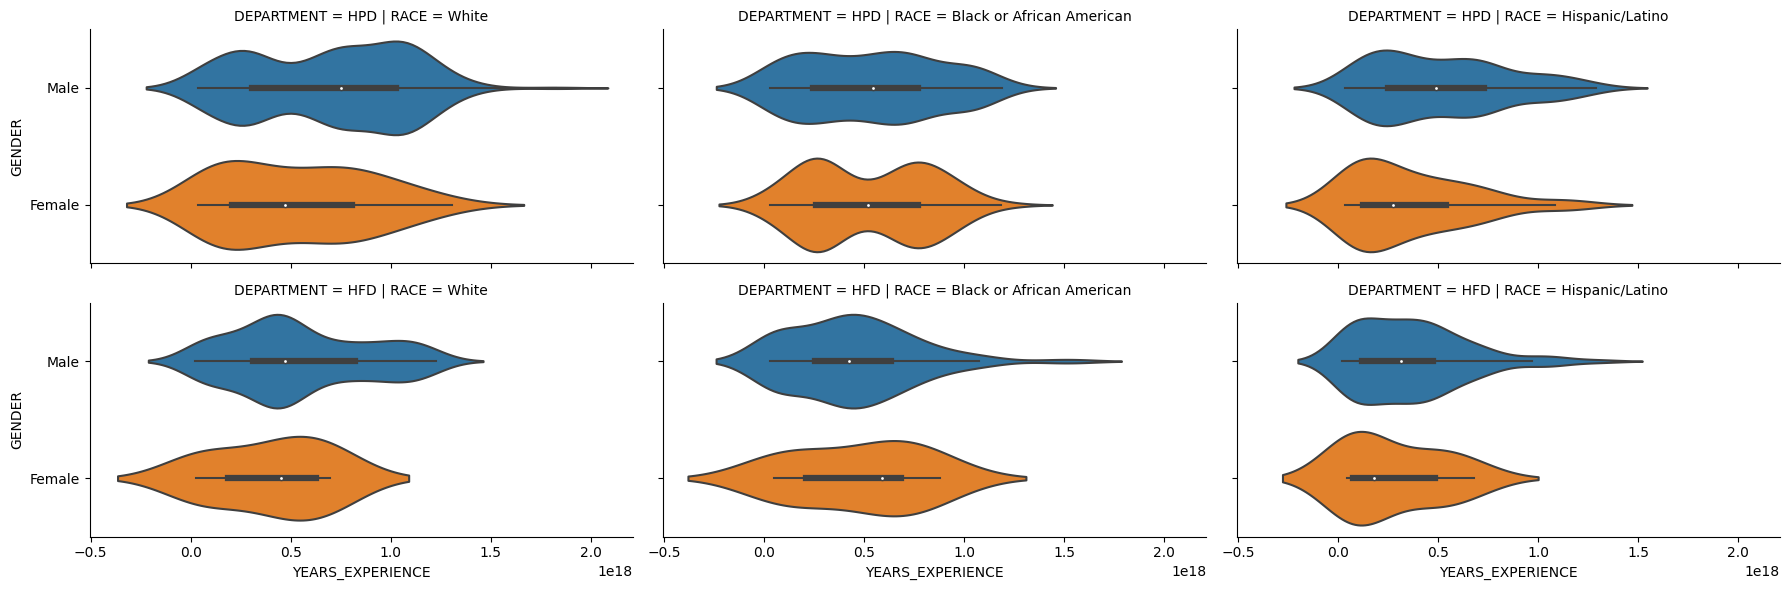

In [128]:
sns.catplot(x='YEARS_EXPERIENCE', y='GENDER',
            col='RACE', row='DEPARTMENT',
            height=3, aspect=2,
            data=emp2, kind='violin')

# Uncovering Simpson's paradox in the diamonds dataset with seaborn

In [129]:
pd.DataFrame(index=['Student A', 'Student B'],
             data={'Raw Score': ['50/100', '80/100'],
                   'Percent Correct':[50,80]}, columns=['Raw Score', 'Percent Correct'])

,Raw Score,Percent Correct
Student A,50/100,50
Student B,80/100,80


In [130]:
pd.DataFrame(index=['Student A', 'Student B'],
             data={'Difficult': ['45/95', '2/5'],
                   'Easy': ['5/5', '78/95'],
                   'Difficult Percent': [47, 40],
                   'Easy Percent' : [100, 82],
                  'Total Percent':[50, 80]},
             columns=['Difficult', 'Easy', 'Difficult Percent', 'Easy Percent', 'Total Percent'])

,Difficult,Easy,Difficult Percent,Easy Percent,Total Percent
Student A,45/95,5/5,47,100,50
Student B,2/5,78/95,40,82,80


In [132]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [133]:
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
diamonds['cut'] = pd.Categorical(diamonds['cut'],
                                 categories=cut_cats,
                                 ordered=True)

diamonds['color'] = pd.Categorical(diamonds['color'],
                                   categories=color_cats,
                                   ordered=True)

diamonds['clarity'] = pd.Categorical(diamonds['clarity'],
                                     categories=clarity_cats,
                                     ordered=True)

Text(0.5, 0.98, 'Price Decreasing with Increasing Quality?')

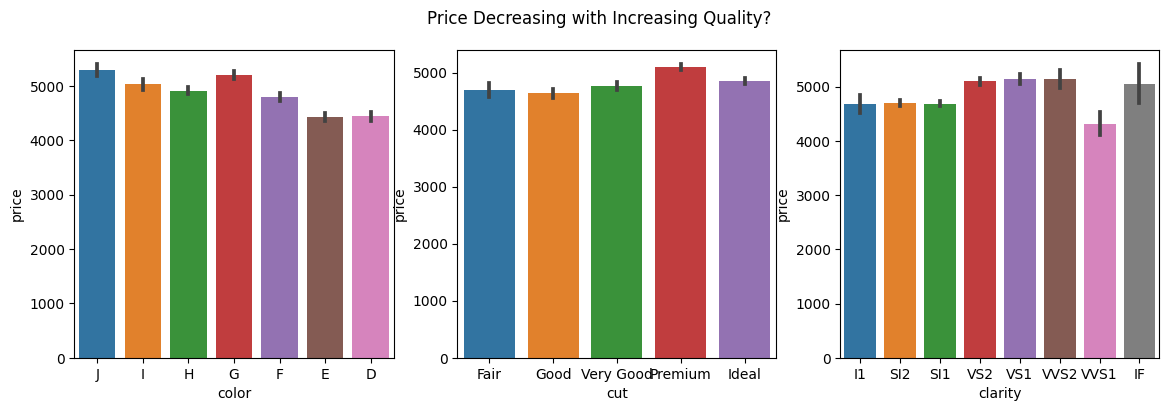

In [134]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='price', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='price', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='price', data=diamonds, ax=ax3)
fig.suptitle('Price Decreasing with Increasing Quality?')

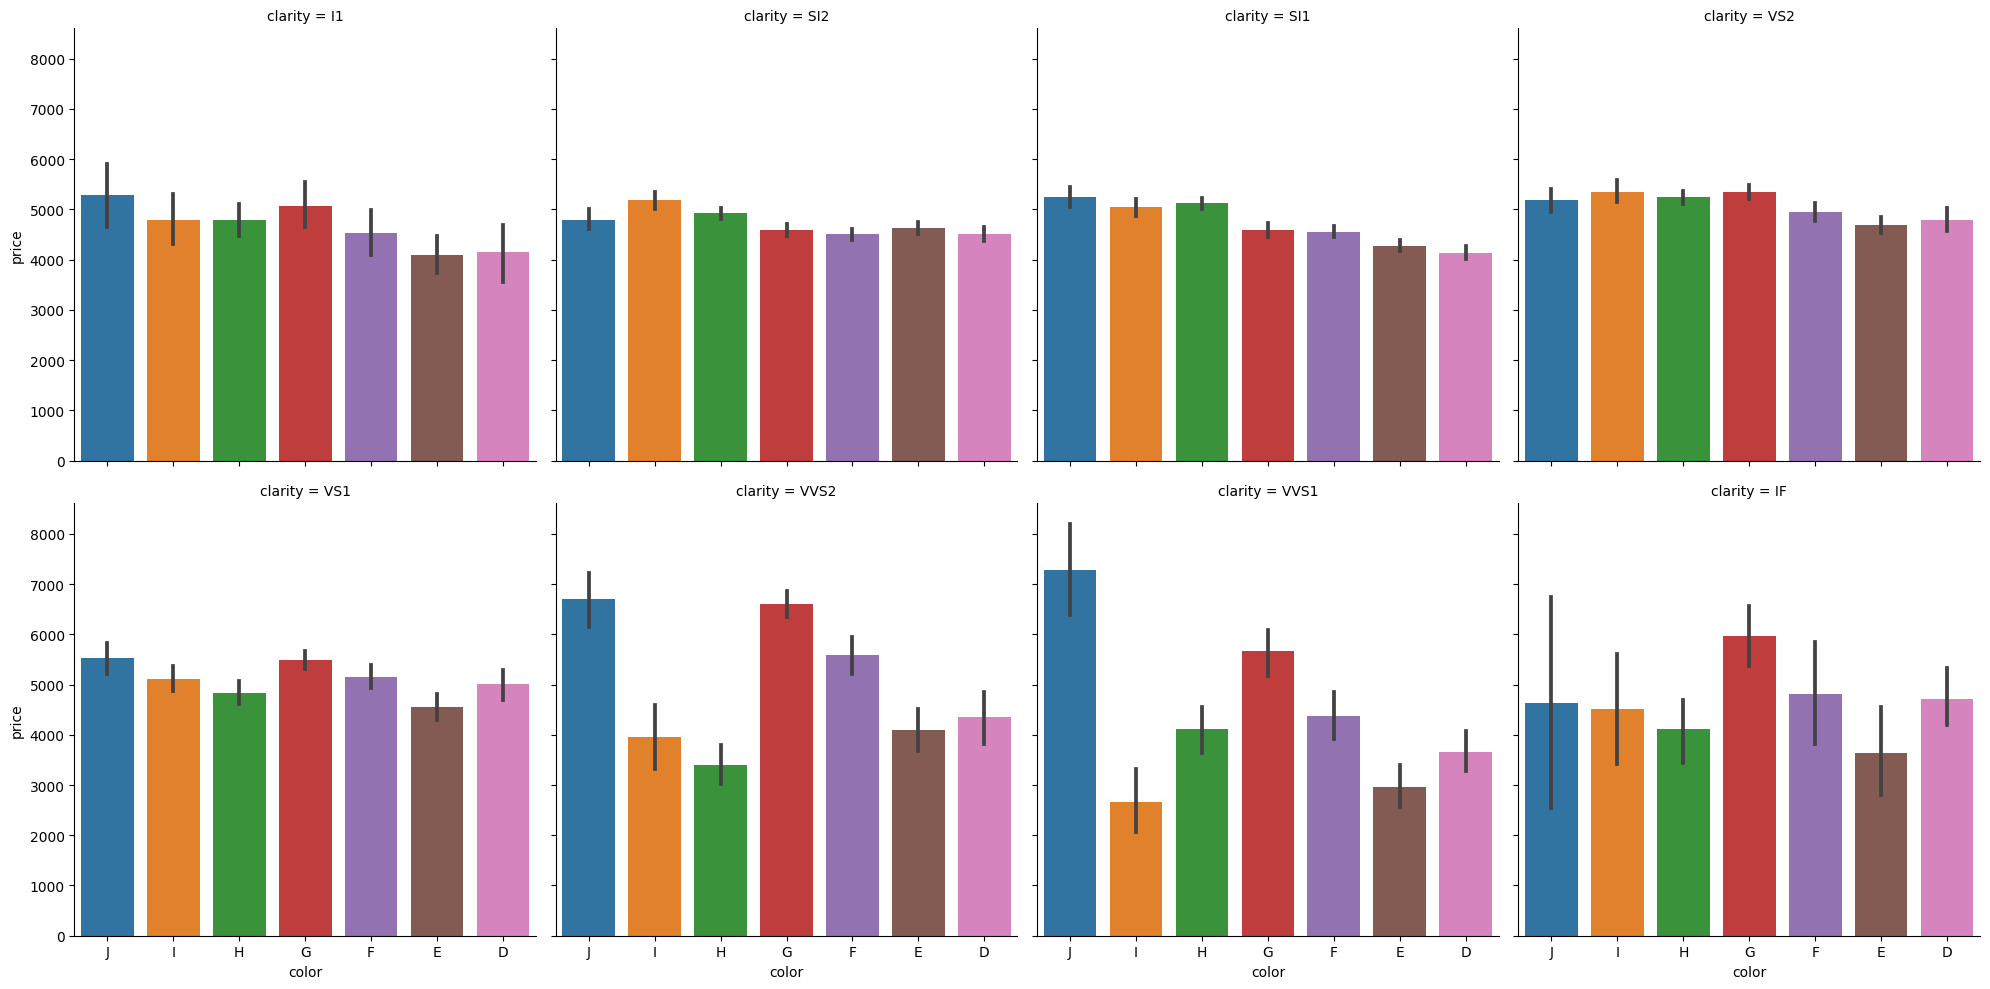

In [136]:
sns.catplot(x='color', y='price', col='clarity',
            col_wrap=4, data=diamonds, kind='bar')

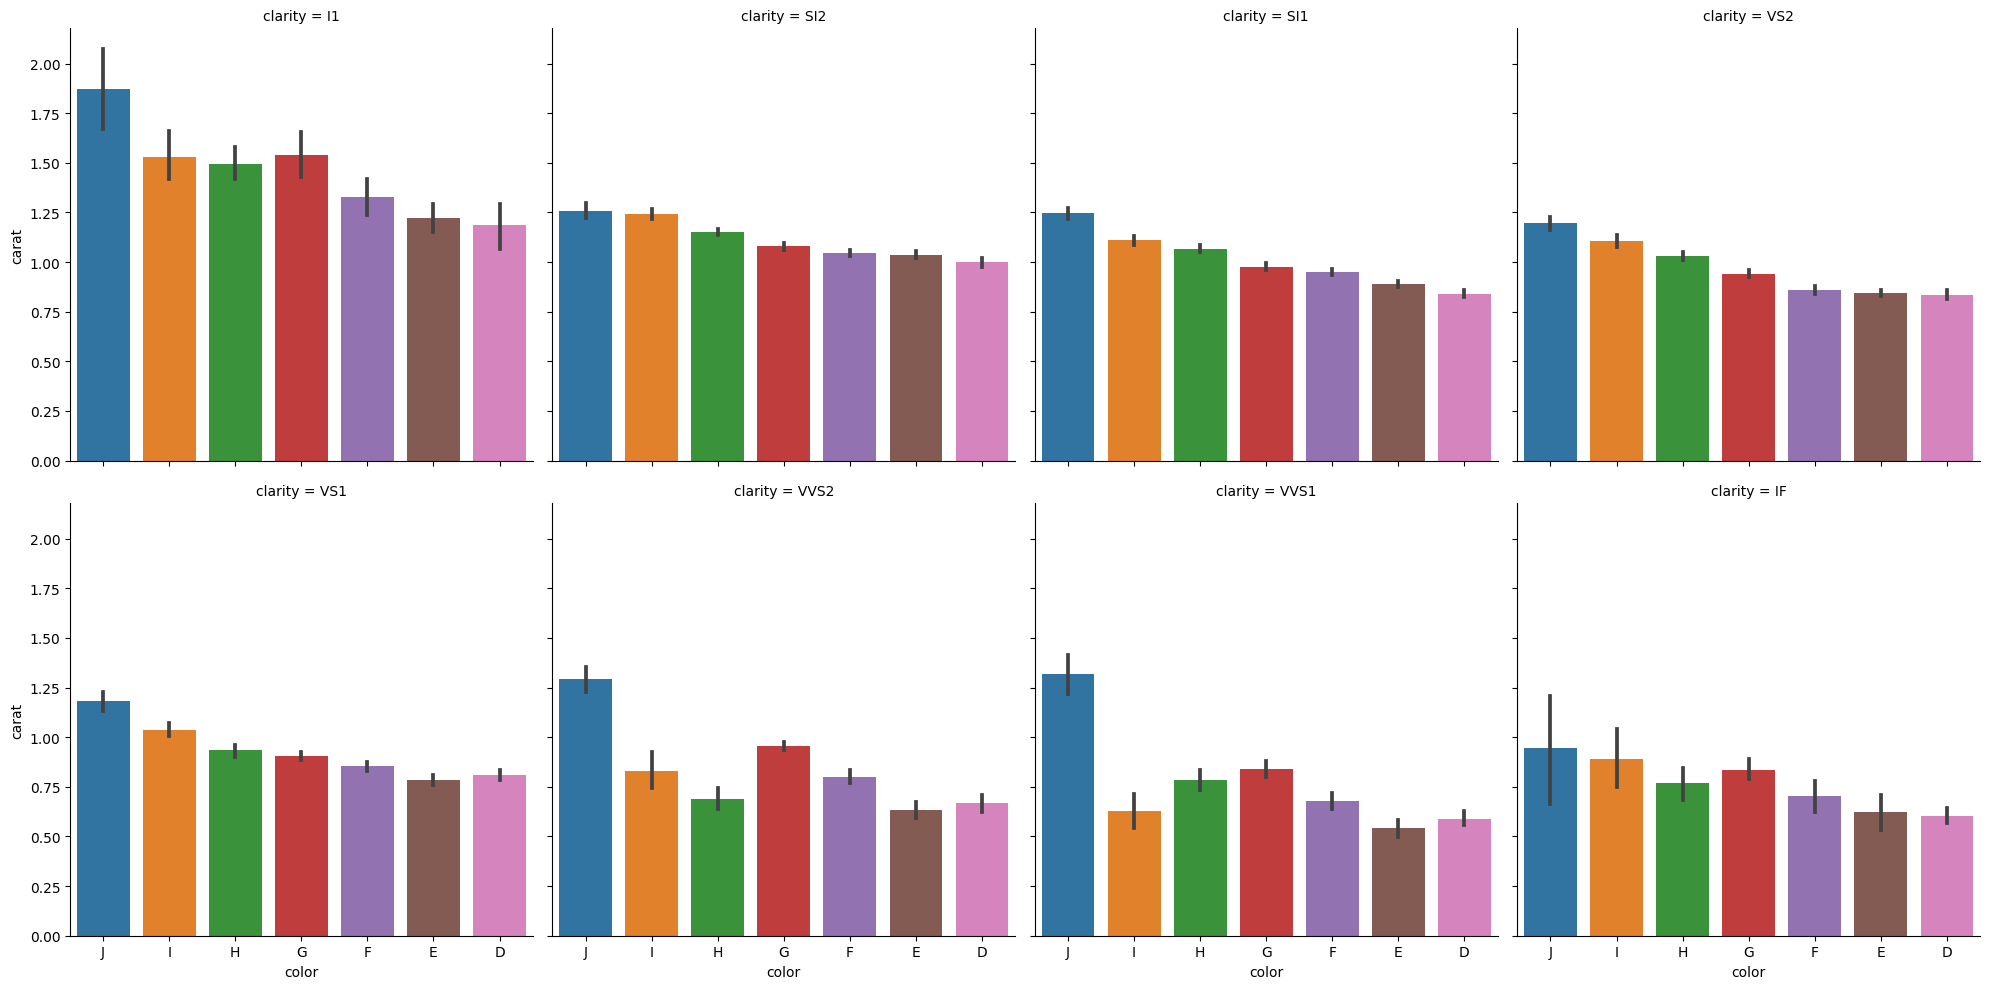

In [137]:
sns.catplot(x='color', y='carat', col='clarity',
            col_wrap=4, data=diamonds, kind='bar')

Text(0.5, 0.98, 'Diamond size decreases with quality')

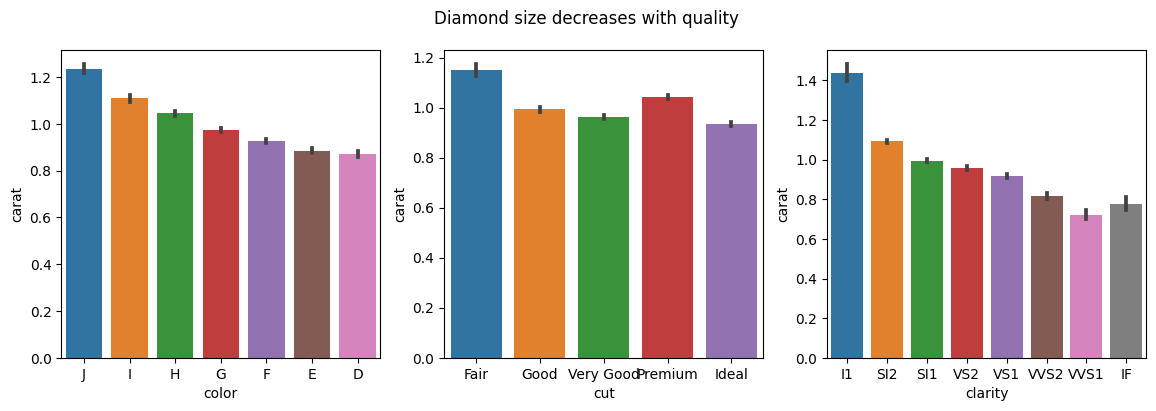

In [138]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='carat', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='carat', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='carat', data=diamonds, ax=ax3)
fig.suptitle('Diamond size decreases with quality')

Text(0.5, 1.02, 'Diamond price by size, color and clarity')

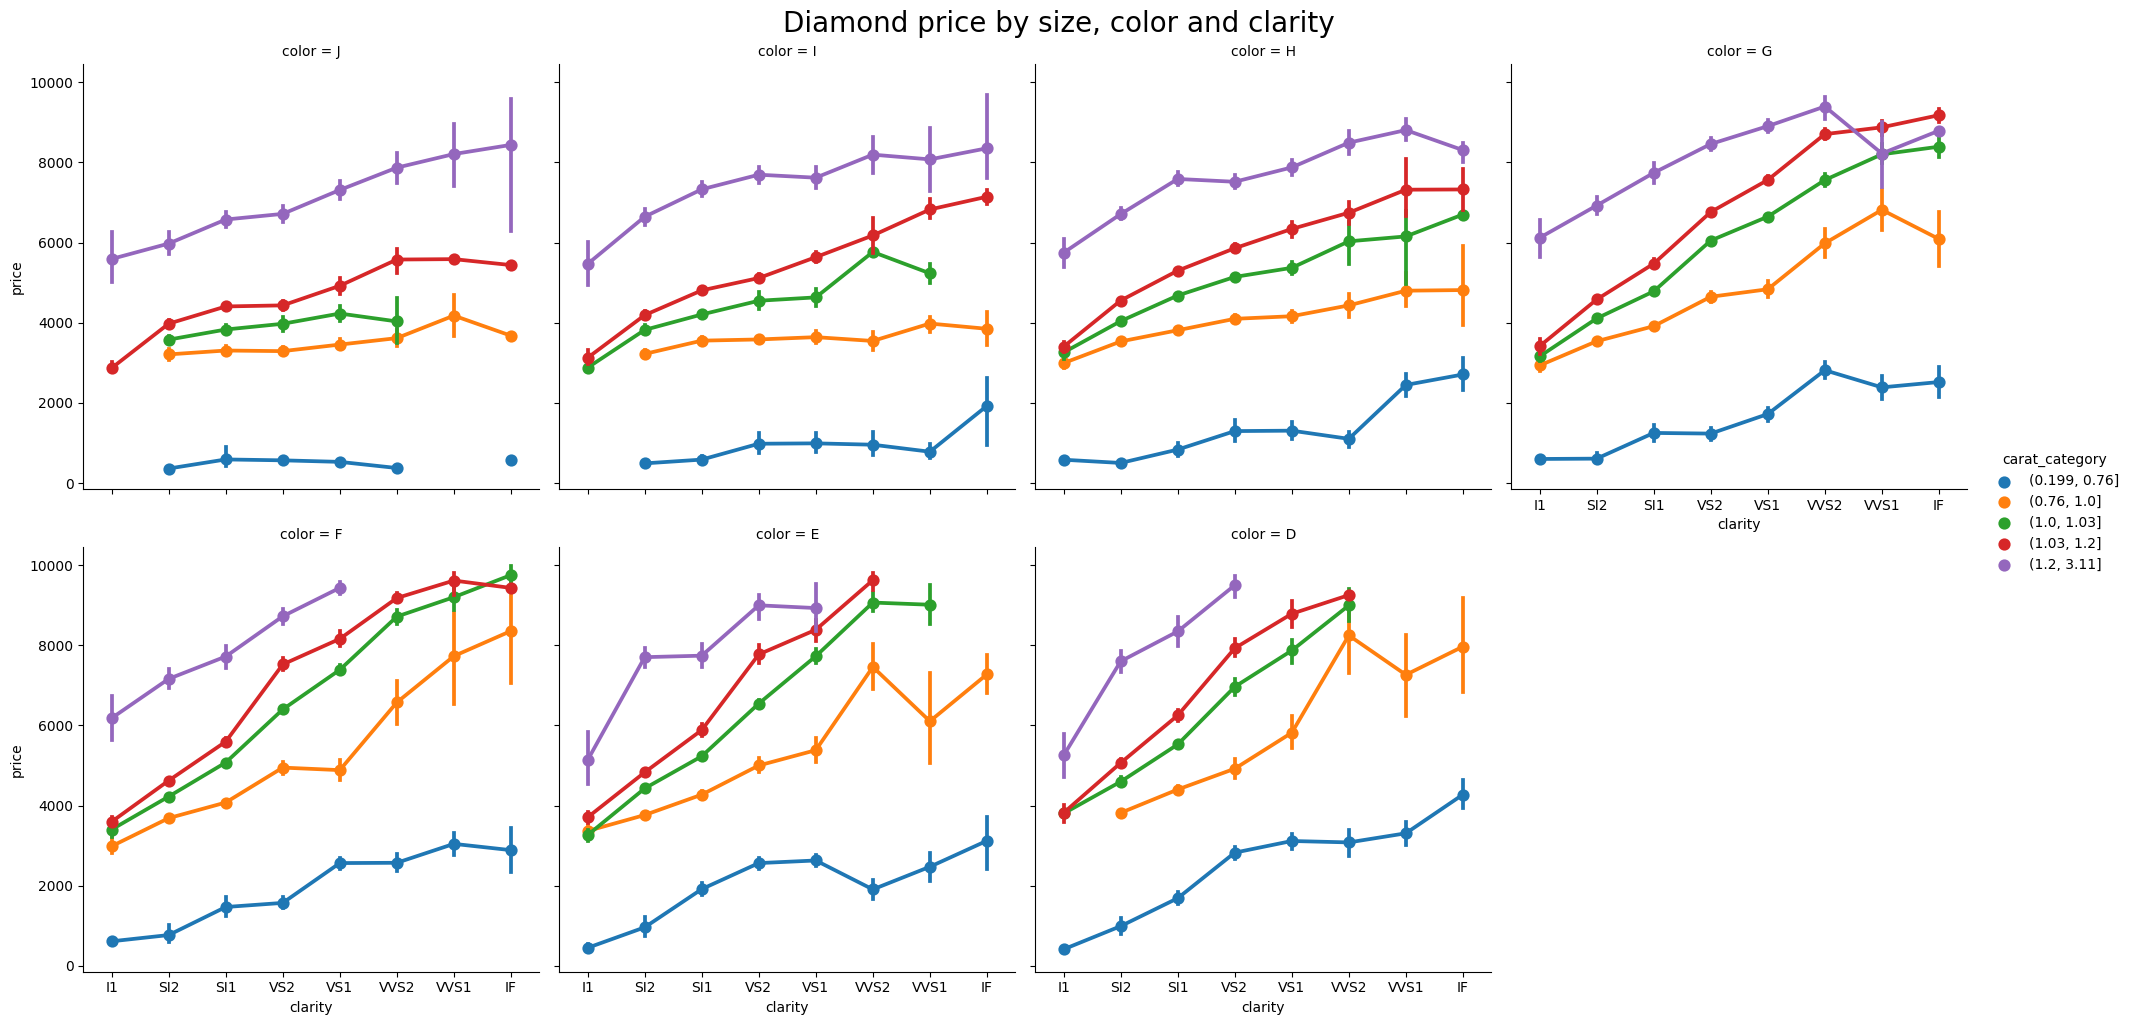

In [139]:
diamonds['carat_category'] = pd.qcut(diamonds.carat, 5)

from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))

g = sns.catplot(x='clarity', y='price', data=diamonds,
                   hue='carat_category', col='color',
                   col_wrap=4, kind='point') #, palette=greys)
g.fig.suptitle('Diamond price by size, color and clarity',
               y=1.02, size=20)

## There's more...

Text(0.5, 1.02, 'Replication of Step 3 with PairGrid')

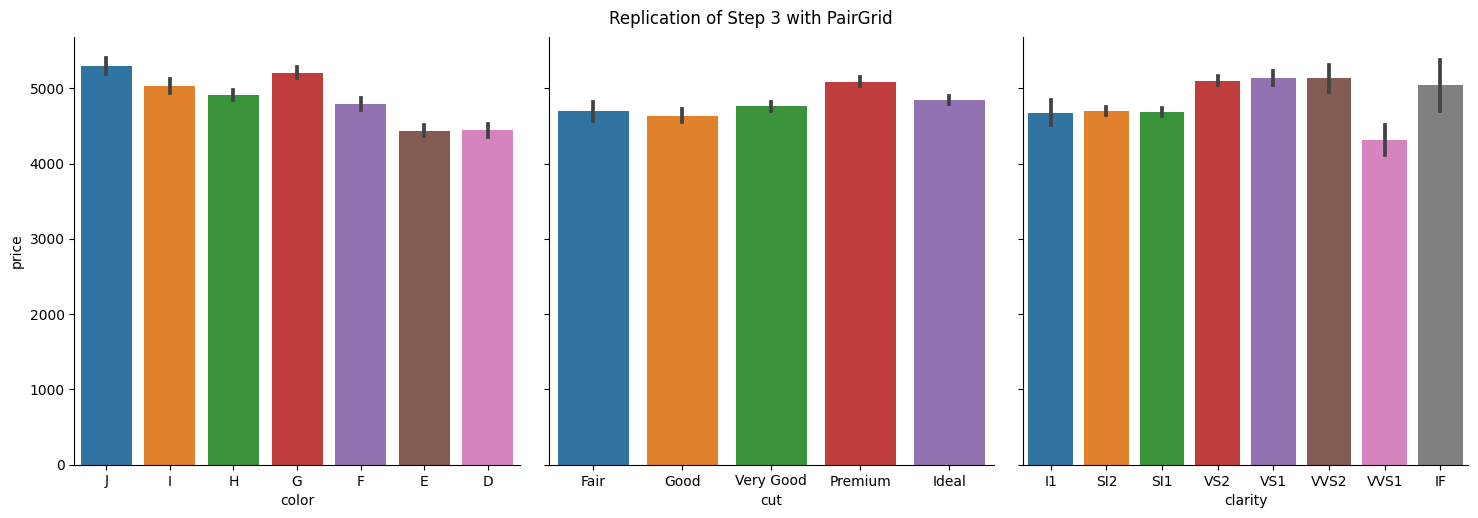

In [141]:
g = sns.PairGrid(data=diamonds, height=5,
                 x_vars=["color", "cut", "clarity"],
                 y_vars=["price"])
g.map(sns.barplot)
g.fig.suptitle('Replication of Step 3 with PairGrid', y=1.02)